#Mounting Google Drive

In [ ]:
'''
Mounting => Before your computer can use any kind of storage device (such as hard drive, Google drive), we or our operating system must make it
accessible through the computer’s file system. This process is called mounting. we can only access files on mounted media.
In Computers, to mount is to make a group of files in a file system structure accessible to a user or user group. In some usages, it means to make a
device physically accessible. Mounting a file system (Google drive) attaches that Google drive to a directory (mount  point) and makes it available to the
system. In simple words, with mounting a Google drive, user and operating system can access to all the files present in the Google drive. A mounted disk 
(a mounted drive) is available to the operating system as a file system, for reading, writing, or both.
'''
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing the Required Libraries

In [ ]:
'''
Python library = python library is the collection of modules(= python files) and this python library is the reusable(=able to use again) chunk(= part, section
, block) of code we want to include in our python programs or projects to make the implementation easier and faster.

import = send 

os module in python provides functions for interacting with the operating system. os module in Python provides functions for creating and removing a 
directory(folder), fetching its contents, os module used for changing and identifying the current directory, etc. Basically os module allows source code
to communicate (interact) with operating system.

Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a python
object into a byte stream to store it in a file/database. Basically pickle library is used to dump (store) all the files of a directory (folder) into 
single combined file (pickle(.pkz) file) for easy fetching and fast retrieval of data. pickle.dump() is used to create a pickle file, it is used to dump
(store) data in a pickle file. pickle.load() is used to load(= start, activate) pickle file

Torch (or PyTorch) is an open-source library for machine learning and deep learning. Torch library provides a wide range of algorithms for machine learning and 
deep learning. The core package of Torch is “torch”, torch package provides a flexible (= adaptable, adjustable, alterable, changeable) N-dimensional array or 
Tensor, which supports basic routines for indexing, slicing, transposing, type-casting, resizing, sharing storage and cloning. The Tensor also supports 
mathematical operations like max, min, sum, statistical distributions like uniform, normal and multinomial, and BLAS operations like dot product, matrix-vector 
multiplication, matrix-matrix multiplication, matrix-vector product and matrix product. The torch package also simplifies object oriented programming and 
serialization by providing various convenience functions which are used throughout its packages 

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled (=separated) from our model training code 
for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow us to use 
pre-loaded datasets as well as our own data. DataLoader wraps an iterable around the Dataset to enable easy access to the samples

torch.utils.data.Dataset is an abstract class representing a dataset. custom dataset (torch dataset) should inherit Dataset and apply the following methods:
(1)__init__ , (2)__len__ , (3)__getitem__ , and (4) an optional argument transform. Dataset stores the samples and their corresponding labels

torch.utils.data.DataLoader wraps an iterable around the Dataset to enable easy access to the samples

numpy module allows us to work with numerical data. numpy provides an object called numpy array. numpy supports large multi-dimensional arrays & matrices. 
Basically numpy is a python library used for working with arrays. numpy used for arithmetic operations, statistical operations, bitwise operations, copying 
and viewing arrays, stacking, matrix operations, linear algebra, mathematical operations, searching, sorting, and counting.

torch.nn => https://www.javatpoint.com/torch_nn-in-pytorch#:~:text=PyTorch%20provides%20the%20torch.,any%20features%20from%20these%20models.
PyTorch provides the torch.nn module to help us in creating and training the neural network (such as CNN). torch.nn provide us many classes and modules to 
implement and train the neural network.

torch.optim => torch.optim is a package(= collection of modules(= python files)) implementing(= applying, using, utilizing) various optimization algorithms.

Matplotlib is the most popular plotting(=sketching, drawing, designing, outlining) library for Python. python library = Collection of modules 
(modules = python files). Pyplot is a Matplotlib module which provides a MATLAB-like interface. Each pyplot function makes some change to a figure. For
example, creates a figure, creates a plotting area in a figure, plots some lines in a plotting area,  decorates the plot with labels, etc. The various plots
we can utilize using Pyplot are Line Plot, Histogram, Scatter, 3D Plot, Image, Contour, hexagonal binnning plot and Polar. Can also import as  
"import matplotlib.pyplot as plt"
 
as keyword is used as alias (AKA, also called as)
'''
import os
import pickle as pkl
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

#PHM IEEE Dataset
Helper Function = A helper function is a function that performs part of the computation (= operation, calculation, estimation, guess) of another function. Helper functions are used to make our programs (= codes) easier to read by giving names to computations. Helper functions also let you reuse computations, just as with functions in general. A helper function is a function we write because we need that particular functionality (= purpose, operation) of a function in multiple places in a code, and because it makes the code more readable. Instead of defining a particular functionality many times, insert(=put, embed) the functionality which we required many times in a helper function, so that we can use that particular functionality as many times we required without defining again

Loading data from pickle(.pkz) file

In [ ]:
'''
#Load Data from Pickle File

def keyword is used to define (= create) a function or method in python

using def keyword we defined (= created) a function load_data_from_pfile and passed an argument file_path. Argument is the value to be passed in a function. 
Here file_path is the location of all pickle files. i.e. file_path = /content/drive/MyDrive/Colab Notebooks 

with keyword => automatically releases memory after allocation. Whenever we open the file with open() function, it allocates some resources and memory to the 
file. And we should use close() function to release or delete that memory from the file otherwise errors will come. Sometimes we forget to close() the file and 
we couldn’t find that we didn’t closed the file, so even the whole code is correct we might get errors and we may not be able to correct it. So it’s better to 
use “with” keyword along with open() function as “with” keyword automatically releases or deletes memory after process completion

The open() function opens a file in text format by default. To open a file in binary format, add 'b' to the mode parameter. Hence the "rb" mode opens the file 
in binary format for reading, while the "wb" mode opens the file in binary format for writing. (Note: there are 2 basic mode parameters (r = read mode,w = write 
mode)). Unlike text files, binary files are not human-readable

as = The as keyword is used to create an alias (= aka, also known as, also called). In the code, we created an alias pfile when opening the file_path, and now 
we can refer to the file_path (or we can access the file_path) by using pfile instead of file_path.

Basically The pickle(.pkz) file is created using Python pickle and the dump() method and is loaded (=started, activated) using Python pickle and the load() 
method. we imported(=send) pickle module as pkl in the code. Therefore pkl.dump() is used to create pickle(.pkz) file and pkl.load() is used to load(=start, 
activate) pickle file. Here, pfile is the pickle file. Pkl.load(pfile) loads (= starts, activates) the pfile in rb (read binary) mode. We stored the loaded 
pfile in sample_data variable.

return keyword = the return keyword is used to exit (= come out from) a function and return a value. Return sample_data => returns value of sample_data and 
                 exits a function.

'''
def load_data_from_pfile(file_path):
    with open(file_path, 'rb') as pfile:
        sample_data = pkl.load(pfile)
    return sample_data

**torch Dataset class**

(Basically, here we created a class for PHM IEEE Dataset(Pronostia Bearing dataset) named PHMDataset and this PHMDataset class inherting(obtaining, acquiring, getting, recieving) the functionality(properties and methods) from PyTorch Dataset class(i.e. torch.utils.data.Dataset))

(Converting numpy array (nd array) into tensor)

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

torch.utils.data is a data loading (=activation) class of Torch (or PyTorch)

torch.utils.data.Dataset is an abstract class representing(= considered as) a dataset. custom dataset (= if the dataset can be modified (=changed) according to our (user’s) requirements, then dataset is considered as custom dataset, for example we are modifying torch dataset in the code, so torch dataset is the custom dataset) should inherit (= acquire, obtain, derive, get, receive) Dataset and apply (= use) the following methods:

(1) `__len__` so that len(dataset) returns the size of the dataset

(2) `__getitem__` to support the indexing such that dataset[i] can be used to get ith sample (data)

In [ ]:
'''
Python classes and objects => https://www.w3schools.com/python/python_classes.asp
A Class is like an object constructor, or a blueprint for creating objects. and objects of the class is used as references to access (= read, get, obtain,
examine, acquire) the class properties (properties = variables, arrays, lists, etc.)

Python Inheritance => https://www.w3schools.com/python/python_inheritance.asp
Inheritance allows us to define a class that inherits (= acquires, obtains, gets, recieves) all the methods and properties from another class.

Created PHMDataset class using class keyword. we send Dataset as the parameter inside the class. To create a class that inherits the functionality (=methods 
and properties) from another class, send the parent class as a parameter when creating the child class. Here, parameter Dataset is the parent class and 
PHMDataset is the child class. Parent class is a class from which a class inherits, parent class also called as base class or super class. Child class is a 
class which inherits from another class (parent class), child class also called as derived class or sub class. class PHMDatset(Dataset) => this means 
PHMDataset class inherits the functionality (= methods and propperties) from Dataset class

Using def keyword, we defined (= created) __init__ function. __init__ function is used to assign values to class object properties or other operations that are 
necessary to do when the object is being created. The __init__() function is called automatically every time the class is being used to create a new object. We 
added __init__() function to the child class, therefore the child class will no longer inherit the parent's __init__() function. The child's __init__() 
function overrides (= removes, ignores) the inheritance of the parent's __init__() function. 
The self parameter is a reference to the current (= present, ongoing) instance (= object) of the class, and is used to access (= read, obtain, examine, acquire) 
the properties (like variables, arrays, lists, dictionaries, tuples, strings) that belongs to the class. (reference in python = a python program accesses 
(= reads, obtains, gets) data values through (= via) references. A reference is a name that refers to the specific (= certain, particular) location in memory of 
a value (object))
created pfiles list and passed as a parameter in __init__ function and assigned an empty list to the pfiles. __init__ function helps in assigning the values.

self.data = {'x': [], 'y': []} => here, self acts as a class (PHMDataset() class) object and data is the dictionary with keys x and y present in PHMDataset() 
class. x key referred to an empty list. y key also referred to an empty list. since self is the object of PHMDataset() class, we can access data dictionary of
PHMDataset class using self parameter i.e. self.data
Total 6 different bearing training dataset pickle files are there, therefore used for loop to access one training pickle file at a time from 6 different pickle
files
underscore can be used as variable name in python. created _data variable, _data is the single leading underscore variable. created _data variable and assigned
(= stored) load_data_from_pfile() function which we created previously and passed pfile as a parameter inside the function. this load_data_from_pfile() function
returns the data of pickle file as an output.
The append() method in python adds a single item to the existing list. It doesn’t return a new list of items but will modify the original list by adding the 
item to the end of the list. After executing the append method on the list the size of the list increases by one. 
self.data['x'].append(_data['x']) => _data['x'] contains the list of horiz accel feature values and vert accel feature values, using append method added 
_data['x'] values to the data dictionary with x key (i.e. data['x']). In data dictionary (data['x']), x key represents an empty list therefore values of _data[x] 
added at the end of x empty list. self parameter is used to access.
Therefore, self.data['x'] contains the list of horiz accel feature values and vert accel feature values of pfile (single pickle file)
self.data['y'].append(_data['y']) => _data['y'] contains the list of failure probability values, using append method added _data['y'] values to the data 
dictionary with y key (i.e. data['y']). In data dictionary (data['y']), y key represents an empty list therefore values of _data[y] added at the end of y empty 
list. self parameter is used to access.
Therefore, self.data['y'] contains the list of failure probability values of pfile (single pickle file)

numpy.concatenate() => https://www.tutorialspoint.com/numpy/numpy_concatenate.htm
Concatenation refers to joining. The concatenate() function is used to join two or more arrays of the same shape along a specified axis. The function takes the 
following parameters. general syntax => numpy.concatenate((a1, a2, ...), axis), here a1, a2, ... => represents Sequence (= order, arrangement) of arrays of the 
same type and axis => represents Axis along which arrays have to be joined. Default is 0.
self.data['x'] = np.concatenate(self.data['x']) => joining list of horiz accel feature values and vert accel feature values of all 6 different bearing
training pickle files as one. Therefore, self.data['x'] now contains the list of horiz accel feature values and vert accel feature values of all pfiles (6 
different bearing training pickle files)
self.data['y'] = np.concatenate(self.data['y']) => joining list of failure probability values of all 6 different bearing training pickle files as one. Therefore
self.data['y'] now contains the list of failure probability values of all pfiles (6 different bearing training pickle files)
np.newaxis is used to add the new axis (= new dimension). Hence, self.data['y'] values are stored in new dimension (= new axis)

def keyword is used to create a function. using def keyword defined (= created) __len__() function and passed self parameter as an argument. __len__() function
returns the size of the dataset. we passed self parameter in __len__() function, hence we can access all self parameter or self object properties inside the
__len__() function.
return self.data['x'].shape[0] => here, __len__() function returns the shape of data['x'] in 0th dimension. shape in python returns the no. of elements in each
dimension. shape returns the output in tuple format. shape[0] => returns the no. of elements in 0th dimension. in data['x'] in 0th dimension(data['x'].shape[0]) 
=> total no. of training pickle data files are present i.e. total no. of horiz accel feature elements and vert accel feature elements are present

def keyword is used to create a function. using def keyword defined (= created) __getitem__() function and passed self parameter and i as argmuments. arguments
are the values that can be passed inside the function. arguments should be passed inside the parenthesis of function name. __getitem__() is used to support the 
indexing such that dataset[i] can be used to get ith sample (ith data). we passed self parameter in __getitem__() function, hence we can access all self 
parameter or self object properties inside the __getitem__() function. i is the index
the function torch.from_numpy() => converts a numpy array into a tensor 
numpy array => https://www.javatpoint.com/numpy-array, 
tensor => https://www.javatpoint.com/pytorch-tensors#:~:text=A%20tensor%20is%20an%20n,computation%20with%20strong%20GPU%20acceleration. 
tensor = torch.from_numpy(numpy.array) => general syntax to Create a Tensor from numpy array
i is used to access the ith data in tensor
created sample dictionary with x and y keys. x key contains tensor of self.data['x'][i] i.e. contains the tensor of all horiz accel feature values and vert
accel feature values. y key contains tensor of self.data['y'][i] i.e. contains the tensor of all failure probability values
return sample => __getitem__() function return the sample dictionary as an output and exits the function

'''
class PHMDataset(Dataset):
    '''
    PHM IEEE 2012 Data Challenge Training data set (6 different Mechanical Bearings data)
    '''
    def __init__(self, pfiles=[]):
        self.data = {'x': [], 'y': []}
        for pfile in pfiles:
            _data = load_data_from_pfile(pfile)
            self.data['x'].append(_data['x'])
            self.data['y'].append(_data['y'])
        self.data['x'] = np.concatenate(self.data['x'])
        self.data['y'] = np.concatenate(self.data['y'])[:,np.newaxis]
    
    def __len__(self):
        return self.data['x'].shape[0]
    
    def __getitem__(self, i):
        sample = {'x': torch.from_numpy(self.data['x'][i]), 'y': torch.from_numpy(self.data['y'][i])}
        return sample

storing 6 different bearings train data pickle files in a single list (train_pfiles) and 6 different bearings validation data pickle files in a single list (val_pfiles)

In [ ]:
'''
created pkzfiles_path variable, and assigned(= allocate, allot, set) the path where the pickle(.pkz) files were saved in the pc or in the google drive.

Python lists => https://www.w3schools.com/python/python_lists.asp (lists are used to store multiple items in a single variable)
created train_pfiles list and stored 6 different bearings train data pickle files (bearing1_1_train_data.pkz, bearing1_2_train_data.pkz, 
bearing2_1_train_data.pkz, bearing2_2_train_data.pkz, bearing3_1_train_data.pkz, bearing3_2_train_data.pkz)

created val_pfiles list and stored 6 different bearings validation data pickle files (bearing1_1_val_data.pkz, bearing1_2_val_data.pkz, 
bearing2_1_val_data.pkz, bearing2_2_val_data.pkz, bearing3_1_val_data.pkz, bearing3_2_val_data.pkz)
'''
pkzfiles_path = '/content/drive/MyDrive/Colab Notebooks/'

train_pfiles = [pkzfiles_path+'bearing1_1_train_data.pkz', pkzfiles_path+'bearing1_2_train_data.pkz', \
                pkzfiles_path+'bearing2_1_train_data.pkz', pkzfiles_path+'bearing2_2_train_data.pkz', \
                pkzfiles_path+'bearing3_1_train_data.pkz', pkzfiles_path+'bearing3_2_train_data.pkz']

val_pfiles = [pkzfiles_path+'bearing1_1_val_data.pkz', pkzfiles_path+'bearing1_2_val_data.pkz', \
              pkzfiles_path+'bearing2_1_val_data.pkz', pkzfiles_path+'bearing2_2_val_data.pkz', \
              pkzfiles_path+'bearing3_1_val_data.pkz', pkzfiles_path+'bearing3_2_val_data.pkz']

Total length (= total no. data files present in train_dataset and total no. of data files present in val_dataset)

In [ ]:
'''
created train_dataset variable and called PHMDataset class and send pfiles list as a parameter inside the class and assigned train_pfiles list to the pfiles.
therefore PHMDataset class now can access to all the train dataset pickle files, hence with train_dataset, can access all train dataset pickle files

created val_dataset variable and called PHMDataset class and send pfiles list as a parameter inside the class and assigned val_pfiles list to the pfiles.
therefore PHMDataset() class now can access to all the validation dataset pickle files, hence with val_dataset, can access all validation dataset pickle files
'''
train_dataset = PHMDataset(pfiles=train_pfiles)
val_dataset = PHMDataset(pfiles=val_pfiles)
print(len(train_dataset), len(val_dataset))

6783 751


In [ ]:
'''
batch_size => refers to the no. of samples in each batch

train_batch_size = 64 => batch size of train dataset is 64, that means train dataset divided into batches (= groups, collection) of data and each batch
contains 64 samples (64 datafiles)

val_batch_size = 64 => batch size of validation dataset is 64, that means validation dataset divided into batches (= groups, collection) of data and each batch
contains 64 samples (64 datafiles)
'''
train_batch_size = 64
val_batch_size = 64

torch DataLoader

sample dataloader(train_dataloader) that loads batch of 64 samples(data files) at a time from train_dataset (without any multiprocessing (= simultaneously process two or more batches of data)

sample dataloader(val_dataloader) that loads batch of 64 samples(data files) at a time from val_dataset (without any multiprocessing (= simultaneously process two or more batches of data)

In [ ]:
'''
DataLoader is an iterator which is used to iterate over train_dataset and val_dataset
train_dataset is our train dataset, train_dataset contains all the train data pickle files
val_dataset is our validation  dataset, val_dataset contains all the validation data pickle files
batch_size => refers to the no. of samples in each batch
shuffle => whether we want the data to be shuffled(= rearranged or reorganized) or not. shuffle is a boolean value, either true or false. shuffle=true 
represents data to be shuffled. shuffle=false represents data not to be shuffled
num_workers => no. of processes needed for loading(= activating, starting) the data, here, num_workers=1, therefore 1 time processing will be carried out for
data loading 
'''
train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=1)
val_dataloader = DataLoader(val_dataset, batch_size=val_batch_size, shuffle=True, num_workers=1)

#Note: 

pytorch expects (takes) input to a CNN as shape - [NxCxHxW] as opposed to [NxHxWxC] in keras or tensorflow. We already have input image feature shapes in [CxHxW] format stored in pickle files

N => batch size, C => no. of channels or no. of filters, H => height of an image in pixels, W => width of an image in pixels


#CNN Model Architecture
https://docs.google.com/presentation/d/1zBWkbJVMJlYxCUdSXEP2LSetPUmhVUfumaAzdb5Zd3I/edit?usp=sharing


([CNN_Architecture](https://docs.google.com/presentation/d/1zBWkbJVMJlYxCUdSXEP2LSetPUmhVUfumaAzdb5Zd3I/edit?usp=sharing) )




#Convolution + Batch Normalization + ReLU Activation

References:

(1) Conv2d - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

(2) torch.nn.Sequential() - https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

(3) BatchNorm1D - https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

(4) BatchNorm2d - https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d

(5) ReLU - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU

In [ ]:
'''
using def keyword, defined(= created) conv_bn_relu() function and passed in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1,
bias=True, padding_mode='zeros', batch_norm=True as parameters(arguments or values) to the function. (in conv_bn_relu(), conv represents convolution, bn 
represents batch normalization, relu represents rectified linear units layer activation function)
in_channels (int datatype only) – Number of channels or number of filters in the input image
out_channels (int datatype only) – Number of channels or number of filters produced by the convolution.(Convolution operation is element-wise multiplication. 
Convolution operation is the element-wise multiplication of each pixel value inside the image. In CNN, the main objective of convolution operation is to extract 
necessary features from the input image)
kernel_size (int datatype or tuple datatype) – Size of the convolving kernel (or convolving filter). (Convolving filter is the filter which we used to perform
convolution operation on the image). for example if kernel_size=3 => means convolving filter (or filter or kernel) will be of the size 3x3
stride (int datatype or tuple datatype, optional) – Stride of the convolution. Default: 1 (stride is the no. of pixels (pixel values) shifts (moves, movements, 
transfers, changes, alterations) over the input image matrix. (Note: shifts are done only from left to right). stride = 1 => means move the filter to 1 pixel 
at a time. (that means if the filter first starts at pixel value 1 and completes the process (matrix multiplication), second time it starts at pixel value 2.). 
stride = 2 => means move the filter to 2 pixels at a time. (that means if the filter first starts at pixel value 1 and completes the process (matrix 
multiplication), second time it starts at pixel value 3.)
padding (int datatype or tuple datatype, optional) – Zero-padding added to all sides of the input. Default: 0. (padding means simply a process of adding 
layers of zeros to our input images. padding = 0 => means adding 0 extra rows and 0 extra columns around (= on every side, on all sides) an input image. 
padding = 1 => means adding 1 extra rows and 1 extra columns around (= on every side, on all sides) an input image. Advantage of padding: padding prevents the 
image from shrinking (= get smaller, reduce size), it also helps preventing dimensionality reduction.)
dilation (int datatype or tuple datatype, optional) – Spacing (= distance, gap) between kernel (or filter) elements. Default: 1
groups - tells us how many output channels(or filters) to be used to combine with input channels to perform convolution. (example: groups=1 means each input
channel combines with total(all) filters to perform convolution and get output, groups=2 means input and output channels divides into 2 groups and performs 
convolution in each group)
bias - After multiply the inputs with weights(filters), we add the bias at last. (in y = ax + b, b => bias, a => weights(filters), x => inputs). Bias is like 
the intercept (b) added in a linear equation (y = ax + b). Bias is an additional parameter in the neural network which is used to adjust the output along with 
the weighted sum of the inputs to the neuron. Thus, Bias is a constant which helps the model in a way that model can fit(= suitable, apt, appropriate, relevant) 
best for the given data. Advantage of Bias : prevents biased prediction(prediction based on favoritism, unfairness prediction, inequality prediction).
bias (bool datatype, optional) – If True, adds a learnable (= able to be learned) bias to the output. Default: True (bias=True)
padding_mode (string datatype, optional) – There are different padding modes in CNN such as 'zeros', 'reflect', 'replicate', 'circular'. Default padding mode: 
'zeros'
batch_norm - batch normalization, rescaling (=resetting, adjusting) all the data (values or pixel values) of a batch (= group, collection) in a particular range 
(-1 to 1) or [-1,1]. (batch_norm=True => if batch_norm is True, batch normalization will be applied)

nn.Conv2d() => Applies a 2D convolution (= 2D convolution means performing convolution operation with 2x2 filters i.e. sliding 2x2 filters over an image) over 
               an input signal. passed in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dialtion, groups=groups, bias=bias,
               padding_mode=padding_mode as arguments (values or parameters) inside the nn.Conv2d() function

nn.init.xavier_uniform_(conv.weight) => method used to randomly(= ela padithe ala) initialize(= activate, start, store) the weights, if we initialize like this,
                                        the training will be better

nn.ReLU() => Applies the Rectified Linear Units function element-wise, ReLU(x) = (x)+ = max(0,x). (ReLU => Rectified Linear Units layer, ReLU is an activation 
function that will output the positive values or non-negative values (> 0) as it is without change, whereas output the negative values (< 0) as zero (0). 
Advantage of ReLU: ReLU allows the models to learn faster and perform better, avoids overfitting.) (Note: Activation function: An activation function transforms 
the shape/representation of the data going into it.)

if batch_norm: => represents if batch_norm is True (i.e. if batch_norm==True) (if batch_norm==True, applies batch normalization over an input image)
return nn.Sequential(conv, nn.BatchNorm2d(out_channels), relu)
return keyword = The return keyword is used to exit (= come out from) a function and return a value
nn.Sequential() function => acts as a sequential(= occuring in an order, consecutive) container(= storage, holder). Modules will be added to Sequential() in the 
order and modules are passed as arguments into the Sequential() function. (Here modules are Conv2d(), BatchNorm2d() and ReLU())
BatchNorm2d() => applies a batch normalization over a 4D input image

else: => represents if batch_norm is False (i.e. if batch_norm==False or if batch_norm!=True) (if batch_norm==False, don't apply batch normalization over an 
         input image)

'''
def conv_bn_relu(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', batch_norm=True):
    conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation, groups=groups, bias=bias, padding_mode=padding_mode)
    nn.init.xavier_uniform_(conv.weight)
    relu = nn.ReLU()
    if batch_norm:
        return nn.Sequential(
            conv,
            nn.BatchNorm2d(out_channels),
            relu
        )
    else:
        return nn.Sequential(
            conv,
            relu
        )

#CNN for Fault Probability prediction

References: 

(1) torch.nn.Module - https://pytorch.org/docs/stable/generated/torch.nn.Module.html

(2) MaxPool2d - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

(3) Flatten - https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten

(4) Linear -  https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

(5) Dropout - https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

(6) forward call or forward pass (forward( )) - https://deeplizard.com/learn/video/MasG7tZj-hw





Note:
pytorch expects (takes) input to a CNN as shape - [NxCxHxW] as opposed to [NxHxWxC] in keras or tensorflow. We already have input image feature shapes in [CxHxW] format stored in pickle files

N => batch size, C => no. of channels or no. of filters, H => height of an image in pixels, W => width of an image in pixels

In [ ]:
'''
Python classes and objects => https://www.w3schools.com/python/python_classes.asp
A Class is like an object constructor, or a blueprint for creating objects. and objects of the class is used as references to access (= read, get, obtain,
examine, acquire) the class properties (properties = variables, arrays, lists, etc.)

Python Inheritance => https://www.w3schools.com/python/python_inheritance.asp
Inheritance allows us to define a class that inherits (= acquires, obtains, gets, recieves) all the methods and properties from another class.

Created CNN_FP class using class keyword. send nn.Module class as the parameter inside the CNN_FP class. nn.Module is the Base class(or super class or parent 
class) for all neural network modules(= basically, a module is a python file. module is a file consisting of python code. module can define functions, classes
and variables). nn.Module class contains all the methods and properties of neural networks. our models should also subclass this class. (i.e. our model 
should inherits (= acquires, obtains, gets, recieves) all the methods and properties from this nn.Module class.). To create a class that inherits the 
functionality (=methods and properties) from another class, send the parent class as a parameter when creating the child class. Here, nn.Module is the parent 
class and CNN_FP is the child class. Parent class is a class from which a class inherits. Child class is a class which inherits from another class (parent 
class), child class also called as derived class or sub class class CNN_FP(nn.Module) => this means CNN_FP class inherits the functionality (= methods and 
properties) from nn.Module class

Using def keyword, we defined (= created) __init__ function. __init__ function is used to assign values to class object properties or other operations that are 
necessary to do when the object is being created. The __init__() function is called automatically every time the class is being used to create a new object. We 
added __init__() function to the child class, therefore the child class will no longer inherit the parent's __init__() function. The child's __init__() function
overrides (= removes, ignores) the inheritance of the parent's __init__() function. The self parameter is a reference to the current (= present, ongoing) 
instance (= object) of the class, and is used to access (= read, obtain, examine, acquire) the properties (like variables, arrays, lists, dictionaries, tuples, 
strings) that belongs to the class. (reference in python = a python program accesses (= reads, obtains, gets) data values through (= via) references. A 
reference is a name that refers to the specific (= certain, particular) location in memory of a value (object))

super().__init__() => this initializes (= starts, activates) the parent class (i.e. nn.Module), basically this activates the nn.Module class and uses nn.Module
class functionality (properties and methods)

conv1 is the property (property in class means variable of a class or array of a class or string of a class or list of a class or dictionary of a class or tuple 
of a class) of CNN_FP class and self parameter is the object of CNN_FP class which is used to access conv1. conv_bn_relu() function applies Convolution, Batch 
Normalization and ReLU activation function if batch_norm is True else (i.e. batch_norm is False) applies Convolution and ReLU activation function. 
conv_bn_relu() function takes in_channels, out_channels, kernel_size, stride, padding, bias=True, batch_norm as parameters (arguments or values) to the function. 
here, in_channels=2, out_channels=16, kernel_size=3, stride=1, padding=1, bias=False, batch_norm=True

pool1 is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access pool1. nn.MaxPool2d() Applies a 2D max pooling 
over an input. (Max pooling is a pooling operation that selects the maximum element (max pixel value) from the region of feature map covered by the filter.) 
(pooling means combining pixel values as groups, since we taken 2x2 filter for max pooling, one 2x2 matrix is considered as one group). Basically max pool 
returns the maximum pixel value (maximum element) from feature maps (feature images) and outputs a pooled feature map. nn.MaxPool2d() takes kernel_size and 
stride as parameters (arguments or values) to the function. here, kernel_size=2, stride=2

conv2, pool2, conv3, pool3, conv4, pool4 => approach is same as conv1 and pool1

flatten is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access flatten. nn.Flatten() Flattens(=reduces) a 
contiguous(=adjacent, side-by-side, close, next-to) range(area, space) of dimensions into a tensor 
(tensor = https://www.javatpoint.com/pytorch-tensors#:~:text=A%20tensor%20is%20an%20n,computation%20with%20strong%20GPU%20acceleration)
(tensor = A tensor is an n-dimensional data container. For example, In PyTorch, 1d-tensor is a vector, 2d-tensor is a matrix, 3d- tensor is a cube, and 
4d-tensor is a cube vector.)
(Basically, flatten => flattening is converting the data (image pixel values) into a 1-dimensional array for inputting it to the next layer. Flatten the output 
                       of the convolution and max pool layers to create a single long feature vector (or single linear continuous vector). And this vector is 
                       connected to the final classification model, which is called a fully-connected layer. 
                       In other words, put all the pixel data (pixel values) in one line and make connections with the final layers (fully connected layers).
                       In the above architecture diagram, after flattening, we got a 1D single long feature vector (1D single linear continuous vector) of 
                       128x8x8 = 8192 size.

fc1 is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access fc1. (fc1 => represents fully connected layer 1).
nn.Linear() Applies a linear transformation to the incoming(=inputting, arriving, entering, comming, approaching) data. (linear transformation = linear 
transformation (sometimes called linear map) is a mapping(= matching process where the points(or data points) of one set are matched against the points of 
another set ) between 2 vector spaces. linear transformation takes a vector as input and transforms(= change, modify, convert)). nn.linear() function takes 
in_features and out_features as parameters. (in_features – size of each input sample, out_features – size of each output sample). here, in_features=8192 
(i.e. size of the input (vector) is 8192), out_features=256 (i.e. size of the output(vector) is 256). Therefore after applying Linear function to the flatten 
layer output, the size of the flatten layer output is reduced from 8192 to 256. (256 is the size of fc1 layer output)

fc2 is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access fc2. (fc2 => represents fully connected layer 2).
nn.Linear() Applies a linear transformation to the incoming data. nn.linear() function takes in_features and out_features as parameters. here, in_features= 256 
out_features=128. Therefore after applying Linear function to the fc1, the size of the fc1 output is reduced from 256 to 128.(128 is the size of the fc2 output)

fc3 is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access fc3. (fc3 => represents fully connected layer 3).
nn.Linear() Applies a linear transformation to the incoming data. nn.linear() function takes in_features and out_features as parameters. here, in_features= 128
out_features=1. Thereforre after applying Linear function to the fc2, the size of the fc2 output is reduced from 128 to 1. (1 is the size of the fc3 output)

dropout1 is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access dropout1. (dropout1 => dropout for fc1).
nn.Dropout() randomly zeroes some of the elements of the input tensor with probability p, during training. Each channel will become zero on every forward call. 
(forward call or forward pass = The "forward pass" refers to calculation process, values of the output layers from the inputs data. forward call or forward pass 
in CNN means traversing(= traveling, moving) through all neurons from first to last layer. A loss function is calculated from the output values.) (neurons in
artificial neural networks(artificial neural netowrks such as CNN, fully connected neural networks or fully connected layers) = 
https://www.tutorialspoint.com/artificial_neural_network/artificial_neural_network_basic_concepts.htm , basically neurons in CNN contains the information
about input signals.). nn.Dropout() function takes p and inplace as parameters. p represents => probability of an element(sample) to be zeroed (probability of 
an element to become zero). Default p value: 0.5. here, p=0.5

dropout2 is the property of CNN_FP class and self parameter is the object of CNN_FP class which is used to access dropout2. (dropout2 => dropout for fc2). 
nn.Dropout() function takes p and inplace as parameters. p represents => probability of an element(sample) to be zeroed (probability of an element to become 
zero). Default p value: 0.5. here, p=0.2

forward() method is a method present in nn.Module class. forward() method applies forward pass or forward call or forward propagation of CNN. (forward call or 
forward pass = The "forward pass" refers to calculation process, calculating the values of the output layers from the inputs data. forward call or forward pass 
in CNN means traversing(= traveling, moving) through all neurons from first to last layer. A loss function is calculated from the output values.) (neurons in 
artificial neural networks(artificial neural netowrks such as CNN, fully connected neural networks or fully connected layers) = 
https://www.tutorialspoint.com/artificial_neural_network/artificial_neural_network_basic_concepts.htm , basically neurons in CNN contains the information
about input signals.)
using def keyword defined(= created) forward() method and passed self and x as the paramters inside the function. self => The self parameter is a reference to 
the current (= present, ongoing) instance (= object) of the class, and is used to access (= read, obtain, examine, acquire) the properties (like variables, 
arrays, lists, dictionaries, tuples, strings, etc.) that belongs to the class. (reference in python = a python program accesses (= reads, obtains, gets) data
values through (= via) references. A reference is a name that refers to the specific (= certain, particular) location in memory of a value (object)). x => x
represents tensor. 
forward() method accepts a tensor as input, and then, returns a tensor as output. the returned tensor will be the output of the network. The forward() method 
is the actual network transformation. The forward method is the mapping that maps(=matches) an input tensor to a prediction output tensor. (To know more about
forward() method refer this link => https://deeplizard.com/learn/video/MasG7tZj-hw)  

'''
class CNN_FP(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = conv_bn_relu(2, 16, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = conv_bn_relu(16, 32, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = conv_bn_relu(32, 64, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv4 = conv_bn_relu(64, 128, 3, stride=1, padding=1, bias=True, batch_norm=True)
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8192, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.2)

    '''
    To perform the convolution operation, we pass the tensor to the forward method of the first convolutional layer, self.conv1. when we call the forward() 
    method of a nn.Module, there is a special way that we make the call. When want to call the forward() method of a nn.Module instance(object), we call the 
    actual instance instead of calling the forward() method directly i.e.
    Instead of doing this => self.conv1.forward(tensor), we do this => self.conv1(tensor). here, x is the tensor
    our input tensor will transform(= change) as we move through the convolution layers. The first convolution layer has a convolution operation, whose 
    output is then passed to a max pooling operation with kernel_size=2 and stride=2 (our input image 1st goes into convolution layer, in this layer convolution
    operation will be performed on the input image)

    The output tensor x of the first convolution layer is then passed to the next convolution layer after applying max pool to the output tensor x, which is 
    identical except for the fact that we call self.conv2() instead of self.conv1(). same procedure for conv3 and conv4 as well. (self.conv3(), self.conv4())

    after applying convolution and max pooling to the tensor x, we flatten (= reduce, reshape) the tensor x (basically we converting n dimensional array into 
    single linear continuous vector) to feed this flattened vector into fully connected layers

    fc1 => represents fully connected layer 1. here, fc1 applies linear transformation (i.e. nn.Linear()) to the tensor x. linear transformation takes a vector 
    as input and transforms(= change, modify, convert))that vector. nn.Linear() function takes in_features and out_features as parameters. (in_features – size 
    of each input sample, out_features – size of each output sample). here, in_features=8192 (i.e. size of the input (vector) is 8192), out_features=256 (i.e. 
    size of the output(vector) is 256). Therefore after applying fc1 layer to the flatten layer output, the size of the flatten layer output is reduced from 
    8192 to 256. (256 is the size of fc1 layer output)

    dropout1 => dropout for fc1. nn.Dropout() randomly zeroes some of the elements of the input tensor x with probability p, during training. Each channel will 
    become zero on every forward call. nn.Dropout() function takes p and inplace as parameters. p represents => probability of an element(sample) to be zeroed 
    (probability of an element to become zero). Default p value: 0.5. here, p=0.5

    nn.ReLU() => Applies the Rectified Linear Units function element-wise, ReLU(x) = (x)+ = max(0,x). (ReLU => Rectified Linear Units layer, ReLU is an 
    activation function that will output the positive values or non-negative values (> 0) as it is without change, whereas output the negative values (< 0) as 
    zero (0). Advantage of ReLU: ReLU allows the models to learn faster and perform better, avoids overfitting.). After applying dropout1 to the tensor x,
    applies ReLU activation function (i.e. nn.ReLU()) to the tensor x )

    fc2 => represents fully connected layer 2. here, fc2 applies linear transformation (i.e. nn.Linear()) to the tensor x. linear transformation takes a vector 
    as input and transforms(= change, modify, convert))that vector. nn.Linear() function takes in_features and out_features as parameters. (in_features – size 
    of each input sample, out_features – size of each output sample). here, in_features=256 (i.e. size of the input (vector) is 256), out_features=128 (i.e. 
    size of the output(vector) is 128). Therefore after applying fc2 layer to the fc1 layer output, the size of the fc1 layer output is reduced from 256 to 
    128. (128 is the size of fc2 layer output)

    dropout2 => dropout for fc2. nn.Dropout() randomly zeroes some of the elements of the input tensor x with probability p, during training. Each channel will 
    become zero on every forward call. nn.Dropout() function takes p and inplace as parameters. p represents => probability of an element(sample) to be zeroed 
    (probability of an element to become zero). Default p value: 0.5. here, p=0.2
    (in dropout1, p value=0.5......in dropout2, p value=0.2)    

    After applying dropout2 to the tensor x, applies ReLU activation function (i.e. nn.ReLU()) to the tensor x) 

    fc3 => represents fully connected layer 3. here, fc3 applies linear transformation (i.e. nn.Linear()) to the tensor x. linear transformation takes a vector 
    as input and transforms(= change, modify, convert))that vector. nn.Linear() function takes in_features and out_features as parameters. (in_features – size 
    of each input sample, out_features – size of each output sample). here, in_features=128 (i.e. size of the input (vector) is 128), out_features=1 (i.e. size 
    of the output(vector) is 1). Therefore after applying fc3 layer to the fc2 layer output, the size of the fc2 layer output is reduced from 128 to 1. (1 is 
    the size of fc3 layer output)

    return keyword => return keyword returns the output of a function and exits the function
    return x => returns the tensor x of forward() and exits the forward() function

    '''
    def forward(self, x):
        # input shape = [Nx2x128x128]
        x = self.conv1(x) # [Nx16x128x128]
        x = self.pool1(x) # [Nx16x64x64]
        x = self.conv2(x) # [Nx32x64x64]
        x = self.pool2(x) # [Nx32x32x32]
        x = self.conv3(x) # [Nx64x32x32]
        x = self.pool3(x) # [Nx64x16x16]
        x = self.conv4(x) # [Nx128x16x16]
        x = self.pool4(x) # [Nx128x8x8]
        x = self.flatten(x) # [Nx8192] {128*8*8=8192} (N => batch size, 128 => no. of channels, 8*8 => height of image*width of image)
        x = self.fc1(x) # [Nx256]
        # x = self.dropout1(x) # apply dropout
        x = nn.ReLU()(x) # apply ReLU activation
        x = self.fc2(x) # [Nx128]
        # x = self.dropout2(x) # apply dropout
        x = nn.ReLU()(x) # apply ReLU activation
        x = self.fc3(x) # final fully connected layer (or) final linear layer [Nx1] -> output is probability of fault
        return x

#Switching from CPU to GPU

(Why switch from CPU to GPU? - training artificial neural networks or deep neural networks(like CNN) with CPU takes more time whereas training with GPU takes very less time compared to CPU. (training time on GPU = 100 * training time on CPU). Therefore GPUs should be used for model training to reduce the training time)

**(1) Declaring a variable "device" which will hold the device(i.e. either GPU or CPU) we are training the model on.**

**Utilizing GPU for computation(= calculation, estimation) with CUDA tensor**

References:

(1) torch.cuda - https://pytorch.org/docs/stable/cuda.html

(2) How to run cuda on google colab jupyter notebook - https://pytorch.org/docs/stable/cuda.html 

(to run cuda on google colab = go to runtime -> change runtime type -> Hardware accelerator or hardware device (GPU) -> save)

(3) torch.Tensor Attributes (torch.device) - https://pytorch.org/docs/stable/tensor_attributes.html



In [ ]:
'''
A torch.device is an object representing the device(= tool, machine) on which a torch.Tensor is or will be allocated(=assigned, alloted). 
The torch.device contains a device type (i.e. 'cpu' or 'cuda') and optional device ordinal for the device type. If the device ordinal is not present, this 
object will always represent the current device for the device type, even after torch.cuda.set_device() is called; e.g., a torch.Tensor constructed with device 
'cuda' is equivalent to 'cuda:X' where X is the result of torch.cuda.current_device(). Basically this torch.device() tells the torch.Tensor that where
torch.Tensor is to be allocated (i.e. either allocated on cpu or gpu(gpu means cuda)). (cpu => central processing unit, gpu => graphics processing unit)

A torch.Tensor’s device can be accessed(=read, obtained, acquired, retrieved, examined) via(=through) the Tensor.device property. A torch.device can be 
constructed via a string or via a string and device ordinal. Here, we constructed(= created, built) the torch.device via a string.

"cuda:0" => CUDA is a model created by Nvidia for parallel computing platform and application programming interface. (parallel computing = parallel computing is
a type of computing architecture in which several processors simultaneously(at a time) execute multiple, smaller calculations broken down from an overall larger
, complex problem). (Application Programming Interface (API) => in computing, an API is an interface(= network, link, connection, communication) that defines 
interactions(= communications) between multiple software applications. An API is a software(= software is the programs(=codes) and other operating information
used by a computer, software => instructions that tell a computer what to do, a set of instructions that directs a computer's hardware to perform a task is 
called a software or program or software program) intermediary(= mediator) that allows 2 applications to talk to each other. In other words, an API is the 
messenger that delivers(=transports, brings) our request(= application, input, input application) to the provider that we are requesting it from and then 
delivers the response(= output, output application) back to us. (An example of API => when we use an application on our mobile phone, the application connects
to the internet and sends data to a server(= A server is a computer that serves(= delivers, supplies, sends) information to other computers). The server than 
retrieves(=fetches, gets, obtains) that data, interprets(=understands) data, performs the necessary actions and sends it back to our mobile phone.) (internet => 
an internet is a vast network that connects computers or smart phones or smart TVs all over the world. Through the internet, people can share information 
communicate with each other from anywhere within an interner connection).)
CUDA is the parallel computing architecture of NVIDIA which allows for dramatic increases in computing performance by harnessing(= utilizing, using) the power 
of the GPU.
"cuda:0" = torch.device('cuda:0') or torch.device("cuda:0") => means device(type='cuda', index=0) or device(type:"cuda", index=0) => device of type "cuda" and
index is 0

torch.cuda.is_available() => torch.cuda adds support for CUDA tensor(= A tensor is a n-dimensional container(for example, 1D tensor is a vector, 2D tensor is a 
matrix, 3D tensor is a cube, 4D tensor is a cube vector)) types, that implement the same function as CPU tensors, but they(CUDA tensors) utilize GPUs for 
computation(= calculation, estimation) 
whenever we want to implement CUDA functions, we should always import(=send) torch.cuda
torch.cuda.is_available() => determine(=discover, find out, tell) if our system supports CUDA or not. (it tells whether CUDA is available in our system(=PC, 
laptop) or not)

print(device) => this prints the device type. (i.e. if torch.cuda.is_available() is True, prints cuda:0 (that means currently our system supporting 
device(type:"cuda", index=0)) else (i.e. if torch.cuda.is_available() is False(not True), prints cpu (if torch.cuda.is_available() is not True, that means our 
system doesn't support cuda, in our system cuda is not available, that means our system runs on CPU and doesn't run on GPU))

device => device gives the type of the device and it's index(=position)

'''
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Declaring a variable "device" which will hold the device(i.e. either GPU or CPU) we are 
                                                                      #training the model on
print(device)
device

cuda:0


device(type='cuda', index=0)

**(2) Connecting(=linking) our model to the device(GPU) to train the model on GPU. (Model training on GPU takes very less time compared to model training on CPU)**

References:

(1) How to train models on the GPU - https://towardsdatascience.com/pytorch-switching-to-the-gpu-a7c0b21e8a99


In [ ]:
'''
connecting CNN_FP() model (or CNN_FP() class) to the device(here device is the GPU). (Note: model.to(device) connects the model or moves the model to the 
device(i.e. either CPU or GPU) so that we can perform our model training on the device(CPU or GPU))
'''
model = CNN_FP().to(device) 

#Training the model

**(1) Loss function**

References:

(a) Loss function => https://medium.com/@zeeshanmulla/cost-activation-loss-function-neural-network-deep-learning-what-are-these-91167825a4de

(Use of Loss function => Loss function is a method of evaluating (= calculating) “how well our algorithm(prediction model or machine learning) models(performs on) our dataset”. If our predictions are totally off(= wrong, mistaken), our loss function will output a higher number. If our predictions are pretty good, our loss function will output a lower number. Since we tune(=adjust) our algorithm to try and improve our model, our loss function will tell us whether our model is improving or not, loss function will tell us whether our model predicting correctly or not. ‘Loss’  helps us to understand how much the predicted value differ from actual value)   

(b) torch.nn.MSELoss ( = MSE Loss (Mean Squared Error Loss) ) => (1) https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718 , (2) https://deeplizard.com/learn/video/Skc8nqJirJg , (3) https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss

(RUL Prediction is a Regression problem. Regression problem => Predicting a value(output) for an input based on previous(=past) data. we are predicting the RUL of Mechanical Bearing using that Bearing's previous performance data (horiz accel and vert accel). Therefore RUL Prediction is considered as a regression problem)

(There are various types of Loss functions. Since RUL Prediction is a regression problem, MSE Loss(Mean Sqaured Error Loss) is used. Generally MSE Loss is used for regression tasks or regresion problems.)

In [ ]:
'''
nn.MSELoss => MSELoss, As the name suggests, this loss is calculated by taking the mean(=average) of squared differences between actual(target) values and 
              predicted values. For a single sample, with MSE, we first calculate the difference (the error) between the provided output prediction(i.e. actual 
              value or target value) and the label(i.e. predicted value(our predicted value)). We then square this error
              ( MSE(input) = (output - label)*(output - label) or MSE = (actual value - predicted value)*(actual value - predicted value) )
              If we passed multiple samples to the model at once (a batch of samples), then we would take the mean of the squared errors over all of these 
              samples

critetion => Here, criterion is the MSEcriterion

nn.MSELoss(reduction='sum') => nn.MSELoss creates a criterion(= norm, model, measure) that measures the mean squared error between each element in the input x 
                               and target y (output y). 
                               (mean squared error = mean(=average) of squared differences between actual(target) values and predicted values.
                               ( MSELoss = [(actual output - predicted output) * (actual output - predicted output)] )
                               reduction='sum' => reduction - Specifies(=tells, indicates) which reduction to apply(=use) to the output:
                                                  reduction='none' => no reduction will be applied
                                                  reduction='mean' => the output will be summed(=added) and the sum of the output will be divided by the number 
                                                  of elements in the output
                                                  reduction='sum' => the output will be summed(=added) and the division by the number of elements in the output
                                                  is avoided 
'''
criterion = nn.MSELoss(reduction='sum')

**(2) Optimizer**

Optimization = maximization, enhancement, improvement, maximizing the model's performance

To train a neural network model (such as CNN), we must define a loss function in order to measure the difference between actual value and prediction value(our prediction value).  Loss function is a method of evaluating (= calculating) “how well our algorithm(prediction model or machine learning) models(performs on) our dataset”. If our predictions are totally off(= wrong, mistaken), our loss function will output a higher number. If our predictions are pretty good, our loss function will output a lower number. our loss function will tell us whether our model is improving or not, loss function will tell us whether our model predicting correctly or not. ‘Loss’ helps us to understand how much the predicted value differ from actual value

we need to use this loss to train our network(model) such that it performs better. Essentially what we need to do is to take the loss and try to minimize(=reduce) it, because a lower loss means our model is going to perform better

Optimizers also called as Optimization algorithms are responsible for reducing the losses and to provide the most accurate results possible. Here we are using
Adam optimizer(Adaptive Moment Estimation optimizer)

References:

(a) Optimizer (= torch.optim) - https://pytorch.org/docs/stable/optim.html

(b)(1) https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html , (2) https://towardsdatascience.com/optimization-algorithms-in-deep-learning-191bfc2737a4 


In [ ]:
'''
torch.optim is a package implementing various optimization algorithms. To use torch.optim you have to construct an optimizer object, that will hold the current 
state and will update the parameters based on the computed gradients. (Computed = calculated) (gradient = gradient simply measures the change in all weights 
with respect to change in error(i.e. change in loss), basically gradient tells us that if loss changes how will the weights changes in neural networks). 
(gradient = difference in loss / difference in weights)

To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variables) to optimize(=improve, make perfect, develop, 
advance, maximize). Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc. (iterable = iterable is an object, which one 
can iterate(=repeat, loop) over. examples: lists, tuples, dictionaries, sets. iterable generates an iterator when passed(=moved) to iter() method. iterator is 
an object, which is used to iterate over an iterable object using next() method. every iterator is also an iterable, but not every iterable is an iterator)

Note: If you need to move a model to GPU via .cuda(), please do so before constructing optimizers for model. Parameters of a model after .cuda() will be 
different objects with those before the call. In general, we should make sure that optimized parameters live in consistent(= unchanging) locations when 
optimizers are constructed and used.

optimizer => here optimizer is the optimizer object(i.e. torch.optim class object)

optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False) => 
optim.Adam implements Adam algorithm. Adam algorithm is an optimization algorithm useful for reducing the losses and to provide the most accurate results 
possible based on computed gradients. Basically Adam algorithm optimize the model by reducing loss function so that the model predicted value and the actual
value will be almost same. A lower loss means our model is going to perform better
model.parameters() => with model.parameters(), we can loop(=repeat, iterate) over the parameters(parameters which we want to optimize) of the model and then 
                      initialize each paramter with tensor functions
lr (float, optional) => learning rate. The learning rate is a hyperparameter(= hyperparameter is a variable which determines the network structure) that 
                        controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning 
                        rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may 
                        result an unstable(= ambiguous, uncertain) training process. Basically, learning rate is a parameter that determines how much an 
                        updating step influences(=effects, affects, impacts, controls) the current value of the weights. here, lr=0.001
betas (Tuple[float, float], optional) – coefficients used for computing running averages of gradient and its square (default: (0.9, 0.999))
eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8) (numerical stability - numerical stability refers to how a
                        malformed(= errored, irregular, faulty) input affects the execution(= performance) of an algorithm. In numerically stable algorithm, 
                        errors in the input lessen(=reduce, minimize, decrease)) as the algorithm executes, having little effect on the final output
weight_decay (float, optional) – weight decay (default: 0). weight decay changes the weights to exponentially(= rapidly, suddenly, abruptly) decay(= decline, 
                                 fall, drop) to zero, if no other update is scheduled
amsgrad (boolean, optional) – whether to use the AMSGrad variant of Adam algorithm or not. AMSgrad is a variant(= derivative, sub-optimizer) of the optimizer 
                              Adam that uses the maximum of past squared gradients to update the parameters.  (default: False)                             

'''

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)

**(3) Learning rate scheduler**

Learning rate - https://www.youtube.com/watch?v=jWT-AX9677k  
(In machine learning and statistics, the learning rate is a tuning(=adjusting) parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. learning rate also called as gain)

(The learning rate is a hyperparameter(= hyperparameter is a variable which determines the network structure) that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result an unstable(= ambiguous, uncertain) training process. Basically, learning rate is a parameter that determines how much an updating step influences(=effects, affects, impacts, controls) the current value of the weights.)

(we need learning rate to multiply the gradients. Basically, we multiply the gradients with learning rate. this learning rate is a small number usually ranging between 0.01 and 0.0001 but the actual value can vary, so any value we get for the gradient is going to become relatively small once we multiply with learning rate.)

Learning rate scheduler - https://www.youtube.com/watch?v=81NJgoR5RfY

(Learning rate scheduler improve the optimization process during the training. Learning rate scheduler adjust(= modify, regulate, alter, change) our learning rate during the training loop based on the no. of epochs. Basically, Learning Rate scheduler(or LR scheduler) adjust the learning rate for better results. Adjusting the learning rate - means most of the time we want to decrease the learning rate, not increase the learning rate, but it always depends on our specific problem. Learning rate scheduler adjust the learning rate during training by reducing the learning rate)

epoch - https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

(An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass. An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network. **" One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. Since one epoch is too big to feed to the computer at once we divide it in several smaller batches(= groups of data, set of data, collection of data). passing the entire dataset through a neural network is not correct as neural network doesn't understand. Therefore we need to pass the full(=entire, complete) dataset multiple times to the same neural network.(that means we divide the dataset into batches and pass each batch at a time to neural network. As the number of epochs increases, more number of times the weights are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve "**)

weight(s) in neural network - (1) https://deepai.org/machine-learning-glossary-and-terms/weight-artificial-neural-network#:~:text=Weight%20is%20the%20parameter%20within,weight%2C%20and%20a%20bias%20value.&text=Often%20the%20weights%20of%20a,hidden%20layers%20of%20the%20network. , (2) https://www.youtube.com/watch?v=82_R6Sgiuo0

(Weight is the parameter within a neural network that transforms(= changes) input data within the network's hidden layers. A neural network is a series of nodes, or series of neurons. Within each node there is a set of inputs, weights, and bias values. As an input enters the node, it gets multiplied by a weight value and the resulting output is either observed, or passed to the next layer in the neural network. Often the weights of a neural network are contained within the hidden layers of the network. Weight affects the amount of influence a change in the input will have upon the output. A low weight value will have no change on the input(therefore no change on the output or slight change on the output), and alternatively a larger weight value will more significantly change the output)

References:

(a) torch.optim.lr_scheduler - https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

In [ ]:
'''
optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20], gamma=0.1, last_epoch=-1, verbose=False) => 
torch.optim.lr_scheduler provides several methods to adjust(= modify, regulate, alter, change) the learning rate based on the number of epochs. Learning rate 
scheduling should be applied after optimizer’s update
torch.optim.lr_scheduler.MultiStepLR() => MultiStepLR() is one of the learning rate schedulers. MultiStepLR() Decays(= decreases) the learning rate of each 
                                          parameter group by gamma once the number of epoch reaches one of the milestones. Notice that such decay can happen 
                                          simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial 
                                          lr as lr
optimizer (Optimizer) – Wrapped optimizer. (Optimizer also called as Optimization algorithm reduce the losses and provide the most accurate results possible. 
                                            Here we are using Adam optimizer(Adaptive Moment Estimation optimizer))  
milestones (list) – List of epoch indices. Must be increasing.
gamma (float) – Multiplicative factor(= multiplier, factor that multiplies) of learning rate decay(= decrease). Default: 0.1
last_epoch (int) – The index(= position) of last epoch. Default: -1. When last_epoch=-1, sets initial lr as lr
verbose (bool) – doubt

'''
multistep_lr_sch = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20], gamma=0.1, last_epoch=-1, verbose=False)

**Calculating Train Loss**

In [ ]:
'''
using def keyword defined(=created) train_epoch() function and passed model, dataloader, criterion, optimizer as parameters inside the function

model.train() => model.train() or model.train(mode=True) sets the mode to train. model.train() tells our model that we are training the model. So effectively 
                 layers like convolution, maxpool, ReLU, dropout, batchnorm etc. which behave different on the train and test procedures know what is going on 
                 and hence can behave accordingly. In case of model.train() => the model knows it has to learn the layers (Note: we think that train() function 
                 trains the model but it does not do that. train() just sets the mode and tells our model that we perform training on the model)

for i, batch in enumerate(dataloader): => i, batch are the iterators and dataloader is the iterable
(iterator in python is an object that is used to iterate(= repeat, loop) over iterable objects like lists, tuples, dictionaries, and sets. the iterator object 
is initialized using the iter() method. iterator uses the next() method for iteration
iterable is an object, which one can iterate(=repeat, loop) over. examples: lists, tuples, dictionaries, sets. iterable generates an iterator when passed
(=moved) to iter() method. iterator is an object, which is used to iterate over an iterable object using next() method
every iterator is also an iterable, but not every iterable is an iterator)
enumerate() => https://www.geeksforgeeks.org/enumerate-in-python/ , https://www.tutorialspoint.com/enumerate-in-python
(A lot of times when dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers task by providing a built-in 
function enumerate() for this task. Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can 
then be used directly in for loops or be converted into a list of tuples using list() method )
(enumerate() syntax = > enumerate(iterable, start=0)
                        Parameters: 
                        Iterable: any object that supports iteration
                        Start: the index value from which the counter is to be started, by default it is 0)
(Basically, The enumerate() function assigns an index to each item in an iterable object that can be used to reference the item later. It makes it easier to 
keep track of the content(= data, information) of an iterable object.)

x = batch['x'].to(device, dtype=torch.float) => connecting batch['x'] (batch['x'] => horiz accel and vert accel feature values of train data) to the device(here 
                                                device is the GPU). A torch.dtype is an object that represents the data type of a torch.Tensor. 
                                                dtype = torch.float represents 32-bit floating point number. (that means batch['x'] connects to GPU as floating 
                                                point datatype) 

y = batch['y'].to(device, dtype=torch.float) => connecting batch['y'] (batch['y'] => fault probability values or failure probability values of train data) to 
                                                the device(here device is the GPU). A torch.dtype is an object that represents the data type of a torch.Tensor. 
                                                dtype = torch.float represents 32-bit floating point number. (thatmeans batch['y'] connects to GPU as floating 
                                                point datatype)

optimizer.zero_grad() => https://pytorch.org/docs/master/generated/torch.optim.Optimizer.zero_grad.html
(optimizer.zero.grad() => Sets(= assigns, allots) the gradients of all optimized torch.Tensor to zero. In PyTorch, we need to set the gradients to zero before 
starting to do backpropragation(backward pass of inputs) because PyTorch accumulates(= adds, sums) the gradients on subsequent(= consecutive, successive, next) 
backward passes. So, the default action is to accumulate (= sum, add) the gradients on every loss.backward() call. Because of this, when we start our training 
loop, ideally we should zero out the gradients so that we do the parameter update correctly. Else the gradient would point in some other direction than the 
intended(= planned) direction towards the minimum(in case of minimization objectives) or maximum (in case of maximization objectives))
(gradient = gradient simply measures the change in all weights with respect to change in error(i.e. change in loss), basically gradient tells us that if loss 
changes how will the weights changes in neural networks). (gradient = difference in loss / difference in weights). (the gradient is a numeric calculation 
allowing us to know how to adjust the parameters of a network in such a way that its output deviation is minimized) )

y_prediction = model(x) => predicting fault probability of train data using CNN

loss = criterion(y_prediction, y) => applies MSELoss to y_prediction and y

loss.backward() => applies back propagation(= back propagation is the process of updating(= changing) the weights of the neural network in order to reduce the 
                   error in prediction). basically loss.backward() is used to compute(= calculate, evaluate) gradients

optimizer.step() => https://pytorch.org/docs/stable/optim.html
(optimizer.step() => applies Gradient Descent(= gradient reduction). All optimizers or optimization algorithms implement a step() method, that updates
(= improves) the parameters. optimizer.step() function is used to update the prameters of neural network. optimizer.step() function can be called once the 
gradients are computed(= calculated, evaluated) using loss.backward() ) 

total_loss += loss.cpu().item() => total_loss = total_loss + loss.cpu().item()
(loss.cpu().item() => loss.cpu() - copying loss to the cpu memory. actually loss present in gpu memory because we are training our model in the gpu memory.
                      calculating the loss in gpu memory is not reliable as it consumes memory of gpu which leads to to cuda out of memory or gpu out of memory
                      error. hence we are copying loss to the cpu memory and calculating loss
                   => .item() act as a pytorch tensor so we can use it as a value )

num_of_samples += x.shape[0] => num_of_samples = num_of_samples + x.shape[0]
(x.shape[0] => x is the horiz accel and vert accel feature values(value images) of the train data
               x.shape => returns the shape of x, x.shape[0] => returns the shape of x in 0th dimension 
               shape => ( https://www.w3schools.com/python/numpy/numpy_array_shape.asp )The shape of an array is the number of elements in each dimension. 
                        shape in python displays output in tuple format. x contains 4 dimensions that means x.shape gives no. of elements in each dimension(i.e. 
                        no. of elements in 4 dimensions). x.shape[0] gives no. of elements in 0th dimension as output (i.e. no. of horiz accel feature image 
                        values and vert accel feature image values of train data) )
(now value of the num_of_samples variable = num_of_samples + x.shape[0]......that means num_of_samples stores the no. of horiz accel and vert accel feature 
image values of train data)

return total_loss/num_of_samples => returns total_loss / num_of_samples (i.e. train loss) and exits train_epoch() function

'''
def train_epoch(model, dataloader, criterion, optimizer):
    total_loss = 0
    num_of_samples = 0
    model.train()
    for i, batch in enumerate(dataloader):
        x = batch['x'].to(device, dtype=torch.float)
        y = batch['y'].to(device, dtype=torch.float)

        optimizer.zero_grad()
        y_prediction = model(x)
        loss = criterion(y_prediction, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.cpu().item()
        num_of_samples += x.shape[0]
    return total_loss/num_of_samples 

**Calculating Validation Loss**

In [ ]:
'''
using def keyword defined(=created) eval() function and passed model, dataloader, criterion as parameters inside the function

model.eval() => model.eval() or model.train(mode=False) sets the mode to validate or test or evaluate. model.eval() tells our model that we are testing the 
                model or validating the model or evaluating the model or checking the model. So effectively layers like convolution, maxpool, ReLU, dropout, 
                batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly. model.eval() => 
                it indicates the model that nothing new is to be learnt and the model is used for validating. (Note: we think that eval() function validates or 
                evaluates the model but it does not do that. eval() just sets the mode and tells our model that we perform validation on the model)

for i, batch in enumerate(dataloader): => i, batch are the iterators and dataloader is the iterable
(iterator in python is an object that is used to iterate(= repeat, loop) over iterable objects like lists, tuples, dictionaries, and sets. the iterator object 
is initialized using the iter() method. iterator uses the next() method for iteration
iterable is an object, which one can iterate(=repeat, loop) over. examples: lists, tuples, dictionaries, sets. iterable generates an iterator when passed
(=moved) to iter() method. iterator is an object, which is used to iterate over an iterable object using next() method
every iterator is also an iterable, but not every iterable is an iterator)
enumerate() => https://www.geeksforgeeks.org/enumerate-in-python/ , https://www.tutorialspoint.com/enumerate-in-python
(A lot of times when dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers task by providing a built-in 
function enumerate() for this task. Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can 
then be used directly in for loops or be converted into a list of tuples using list() method )
(enumerate() syntax = > enumerate(iterable, start=0)
                        Parameters: 
                        Iterable: any object that supports iteration
                        Start: the index value from which the counter is to be started, by default it is 0)
(Basically, The enumerate() function assigns an index to each item in an iterable object that can be used to reference the item later. It makes it easier to 
keep track of the content(= data, information) of an iterable object.)

x = batch['x'].to(device, dtype=torch.float) => connecting batch['x'] (batch['x'] => horiz accel and vert accel feature values of val data) to the device(here 
                                                device is the GPU). A torch.dtype is an object that represents the data type of a torch.Tensor. 
                                                dtype = torch.float represents 32-bit floating point number. (that means batch['x'] connects to GPU as floating 
                                                point datatype)

y = batch['y'].to(device, dtype=torch.float) => connecting batch['y'] (batch['y'] => fault probability values or failure probability values of val data) to the 
                                                device(here device is the GPU). A torch.dtype is an object that represents the data type of a torch.Tensor. 
                                                dtype = torch.float represents 32-bit floating point number. (thatmeans batch['y'] connects to GPU as floating 
                                                point datatype) 

with torch.no_grad(): => with statement in python automatically closes the opened file(automatically releases the memory) without using close() function
                         torch.no_grad() => (1) https://pytorch.org/docs/stable/generated/torch.no_grad.html , 
                                            (2) https://stackoverflow.com/questions/63351268/torch-no-grad-affects-on-model-accuracy
                         (torch.no_grad() basically skips(=ignores) the gradient calculation over the weights. That means we are not changing any weight in the 
                         specified layers. torch.no_grad() just disables the tracking of any calculations required to calculate a gradient. It won't have any 
                         effect on accuracy in a pure inference mode, since gradients are not needed there. but we can't use torch.no_grad() during training 
                         time since we need the gradients to train and optimize(=imprrove, enhance) the model. In general if we go for inference we always want 
                         to set the network to eval mode and disable gradients. This saves run time and memory consumption and won't affect accuracy. )
                         (inference => Inference refers to the process of using a trained machine learning model to make a prediction.)
                         (gradient = gradient simply measures the change in all weights with respect to change in error(i.e. change in loss), basically gradient 
                         tells us that if loss changes how will the weights changes in neural networks). (gradient = difference in loss / difference in weights). 
                         (the gradient is a numeric calculation allowing us to know how to adjust the parameters of a network in such a way that its output 
                         deviation is minimized) )

y_prediction = model(x) => predicting fault probability of val data using CNN

loss = criterion(y_prediction, y) => applies MSELoss to y_prediction and y

total_loss += loss.cpu().item() => total_loss = total_loss + loss.cpu().item()
(loss.cpu().item() => loss.cpu() - copying loss to the cpu memory. actually loss present in gpu memory because we are training our model in the gpu memory.
                      calculating the loss in gpu memory is not reliable as it consumes memory of gpu which leads to to cuda out of memory or gpu out of memory
                      error. hence we are copying loss to the cpu memory and calculating loss
                   => .item() act as a pytorch tensor so we can use it as a value )

num_of_samples += x.shape[0] => num_of_samples = num_of_samples + x.shape[0]
(x.shape[0] => x is the horiz accel and vert accel feature values(value images) of the val data
               x.shape => returns the shape of x, x.shape[0] => returns the shape of x in 0th dimension 
               shape => ( https://www.w3schools.com/python/numpy/numpy_array_shape.asp )The shape of an array is the number of elements in each dimension. 
                        shape in python displays output in tuple format. x contains 4 dimensions that means x.shape gives no. of elements in each dimension(i.e. 
                        no. of elements in 4 dimensions). x.shape[0] gives no. of elements in 0th dimension as output (i.e. no. of horiz accel feature image 
                        values and vert accel feature image values of val data) )
(now value of the num_of_samples variable = num_of_samples + x.shape[0]......that means num_of_samples stores the no. of horiz accel and vert accel feature 
image values of val data)

return total_loss/num_of_samples => returns total_loss / num_of_samples (i.e. val loss) and exits eval() function

'''
def eval(model, dataloader, criterion):
    total_loss = 0
    num_of_samples = 0
    model.eval()
    for i, batch in enumerate(dataloader):
        x = batch['x'].to(device, dtype=torch.float)
        y = batch['y'].to(device, dtype=torch.float)

        with torch.no_grad():
            y_prediction = model(x)
            loss = criterion(y_prediction, y)

        total_loss += loss.cpu().item()
        num_of_samples += x.shape[0]
    return total_loss/num_of_samples

**Printing Train Loss and Val Loss**

In [ ]:
'''
max_epochs = 30 => assigned 30 to max_epochs variable. therefore train loss and val loss will be calculated and displayed for maximium 30 epochs (1 to 30)
(An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a 
backward pass together are counted as one pass. An epoch is made up of one or more batches of the dataset and epoch is used to train the neural network. 
"One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. Since one epoch is too big to feed to the computer at 
once we divide it into several smaller batches(= groups of data, set of data, collection of data). passing the entire dataset through a neural network is not 
correct as neural network doesn't understand. Therefore we need to pass the full(=entire, complete) dataset multiple times to the same neural network.(that 
means we divide the dataset into batches and pass each batch at a time to neural network. As the number of epochs increases, more number of times the weights 
are changed in the neural network and the curve goes from underfitting to optimal(= ideal, perfect) to overfitting curve ")

loss_vals = [] => is an empty list

for epoch in range(max_epochs): => for - https://www.w3schools.com/python/python_for_loops.asp (A for loop is used for iterating over a sequence (that is either 
                                   a range, a list, a tuple, a dictionary, a set, or a string).)
                                   epoch - epoch is the iterator used to iterate over the max_epochs range
                                   range() - https://www.w3schools.com/python/ref_func_range.asp (The range() function returns a sequence(= series) of numbers, 
                                   starting from 0 by default, and increments by 1 (by default), and stops before a specified number.)
                                   max_epochs - max_epochs is an iterable which epoch can iterate over

train_loss = train_epoch(model, train_dataloader, criterion, optimizer) => train_loss stores the function which calculates train loss and returns the train 
             loss of each epoch

val_loss = eval(model, val_dataloader, criterion) => val_loss stores the function which calculates validation loss and returns the validation loss of each epoch

multistep_lr_sch.step() => means calling scheduler.step(), here scheduler(or learning rate scheduler) is multistep_lr_sch (If we don’t call scheduler.step(), 
                           the learning rate won’t be changed and stays at the initial value. Note: the scheduler will just manipulate the learning rate. It 
                           won’t update the model. Therefore you should call scheduler.step() in the epoch loop)

loss_vals.append([train_loss, val_loss]) => The append() method appends(= adds) an element to the end of the list. In loss_vals.append([train_loss, val_loss]),
                                            loss_vals is an empty list. in loss_vals list we are appending(= adding) the list of train_loss and val_loss of
                                            every epoch from 1 to 30

print('{0}/{1}: train_loss = {2:.4f}, val_loss = {3:.4f}'.format(epoch+1, max_epochs, train_loss, val_loss) ) => printing nth epoch of max_epochs (here, 
n = 1, 2, 3,--------,30) i.e. (1/30, 2/30, 3/30, ----------, 30/30), and train loss upto 4 decimal points of each epoch, and val loss upto 4 decimal points of 
each epoch
(format() => The format() function formats(= arranges, configures, presents) a specified value into a specified format. )

'''
max_epochs = 30

loss_vals = []
for epoch in range(max_epochs):
    train_loss = train_epoch(model, train_dataloader, criterion, optimizer)
    val_loss = eval(model, val_dataloader, criterion)
    multistep_lr_sch.step()
    loss_vals.append([train_loss, val_loss])
    print('{0}/{1}: train_loss = {2:.4f}, val_loss = {3:.4f}'.format(epoch+1, max_epochs, train_loss, val_loss) )

1/30: train_loss = 0.6206, val_loss = 0.0457
2/30: train_loss = 0.0351, val_loss = 0.0294
3/30: train_loss = 0.0287, val_loss = 0.0264
4/30: train_loss = 0.0202, val_loss = 0.0332
5/30: train_loss = 0.0153, val_loss = 0.0172
6/30: train_loss = 0.0175, val_loss = 0.0203
7/30: train_loss = 0.0151, val_loss = 0.0204
8/30: train_loss = 0.0108, val_loss = 0.0189
9/30: train_loss = 0.0127, val_loss = 0.0191
10/30: train_loss = 0.0098, val_loss = 0.0186
11/30: train_loss = 0.0065, val_loss = 0.0094
12/30: train_loss = 0.0058, val_loss = 0.0090
13/30: train_loss = 0.0055, val_loss = 0.0091
14/30: train_loss = 0.0053, val_loss = 0.0088
15/30: train_loss = 0.0053, val_loss = 0.0088
16/30: train_loss = 0.0051, val_loss = 0.0091
17/30: train_loss = 0.0049, val_loss = 0.0089
18/30: train_loss = 0.0049, val_loss = 0.0099
19/30: train_loss = 0.0048, val_loss = 0.0093
20/30: train_loss = 0.0048, val_loss = 0.0087
21/30: train_loss = 0.0042, val_loss = 0.0084
22/30: train_loss = 0.0041, val_loss = 0.00

**Plotting train loss and val loss**

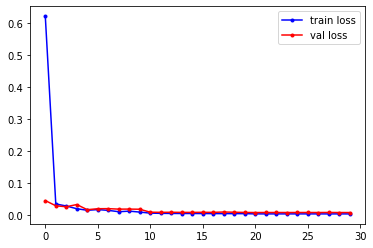

In [ ]:
'''
plt.plot(range(max_epochs), [l[0] for l in loss_vals], 'b.-', label='train loss') => 
(The plot() function in pyplot module of matplotlib library is used to make a 2D hexagonal binning plot of points x, y. the below output is the example of 2D
hexagonal binning plot of points x,y. The plot() function is used to draw points(markers) in a diagram. By default, the plot() function draws a line from point 
to point. The function takes parameters for specifying(= describing, drawing) points in the diagram. Parameter 1 is an array containing the points on the x-axis. 
Parameter 2 is an array containing the points on the y-axis.)
(range() - https://www.w3schools.com/python/ref_func_range.asp (The range() function returns a sequence(= series) of numbers, starting from 0 by default, and 
increments by 1 (by default), and stops before a specified number.))
(max_epochs = 30)
(l[0] for l in loss_vals => l[0] in loss_vals represents train_loss(i.e. x-axis), therefore l[0] for l in loss_vals means traversing(=moving) through all train 
loss from epoch 1 to epoch 30)
('b.-' => represents blue color for points and line in a diagram or plot)
(label='train loss' => i.e. x-axis name is train loss)

plt.plot(range(max_epochs), [l[1] for l in loss_vals], 'r.-', label='val loss') =>
(l[1] for l in loss_vals => l[1] in loss_vals represents val_loss(i.e. y-axis), therefore l[1] for l in loss_vals means traversing(=moving) through all val loss 
from epoch 1 to epoch 30)
('r.-' => represents red color for points and line in a diagram or plot)
(label='val loss' => i.e. y-axis name is train loss)

plt.legend() => plt.legend() is used to display the tags or labels(train loss and val loss) on right top of the plot

plt.show() => The show() function in pyplot module of matplotlib library is used to display the plot or diagram or figure. here, plt.show() is used to display 
              the hexagonal binning plot as shown in output

'''
plt.plot(range(max_epochs), [l[0] for l in loss_vals], 'b.-', label='train loss')
plt.plot(range(max_epochs), [l[1] for l in loss_vals], 'r.-', label='val loss')
plt.legend()
plt.show()

**Saving the Model**

In [ ]:
'''
torch.save() => saves the model (saves the tensor object) to the PC or to the Google Drive. here, model is CNN_FP(), CNN model for fault probability estimation

model.state_dict() => https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_models_for_inference.html , 
                      https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html
                      (In PyTorch, the learnable parameters (i.e. weights and biases) of a torch.nn.Module model are contained in the model’s parameters 
                      (accessed with model.parameters()). A state_dict is an essential entity(=object) if you are interested in saving or loading models from 
                      PyTorch. Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal 
                      of modularity to PyTorch models and optimizers. Note that only layers with learnable parameters (convolutional layers, linear layers, 
                      etc.) and registered buffers (batchnorm’s running_mean) have entries in the model’s state_dict. Saving the model’s state_dict (i.e. 
                      model.state_dict()) with the torch.save() function will give the most flexibility for restoring the model later. model.state_dict() is the 
                      recommended method for saving models, because it only saves the trained model’s learned parameters. )
                      (torch.save(model.state_dict()) saves only the trained model parameters (parameters means inputs, weights, bias, convolution layer etc))
                      (Note: Modularity - Modularity refers to the concept of making multiple modules first and then linking and combining them to form a 
                      complete system.  Modularity enables re-usability and will minimize duplication.)
                      (Note: Inference - Inference refers to the process of using a trained machine learning model to make a prediction. Basically inference 
                      means validating the trained model)
                      (Basically, model.state_dict() => save a trained model, torch.save() => save a model)

torch.save(model.state_dict()) => saves only the trained model parameters

'/content/drive/MyDrive/Colab Notebooks/Models/cnn_model1.pth' => '/content/drive/MyDrive/Colab Notebooks/Models/ - is the path where we want to save the model
                                                                   'cnn_model1.pth' - is the saved model file name (.pth extension or .pth FileType - The pth 
                                                                   file type is primarily associated(= connected, linked, related) with PyTorch. pth is a data 
                                                                   file for Machine Learning model or Deep Learning model with PyTorch. ) 

'''
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/Models/cnn_model1.pth')

#Evaluating or Validating the Model Performance

**Loading the Model**

In [ ]:
'''
 model.load_state_dict() => load(= start, activate) the saved trained model of model.state_dict(), torch.load() => load the saved model of torch.save()
 ((In PyTorch, the learnable parameters (i.e. weights and biases) of a torch.nn.Module model are contained in the model’s parameters (accessed with 
 model.parameters()). A state_dict is an essential entity(=object) if you are interested in saving or loading models from PyTorch. Because state_dict objects 
 are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers. Note 
 that only layers with learnable parameters (convolutional layers, linear layers, etc.) and registered buffers (batchnorm’s running_mean) have entries in the 
 model’s state_dict. model.load_state_dict() is the recommended method for loading models, because it loads the trained model’s learned parameters.
 
 model.load_state_dict(torch.load()) => loads(= starts, activates) only the trained model parameters

 '/content/drive/MyDrive/Colab Notebooks/Models/cnn_model1.pth' => '/content/drive/MyDrive/Colab Notebooks/Models/ - is the path where we want to load the model 
                                                                   from 
                                                                   'cnn_model1.pth' - is the model file name which we want to load(.pth extension or .pth 
                                                                   FileType - The pth file type is primarily associated(= connected, linked, related) with 
                                                                   PyTorch. pth is a data file for Machine Learning model or Deep Learning model with PyTorch.)
                                                                   
 <All keys matched successfully> represents => loading is successful (that means no missing keys or unexpected keys were found which interrupts the loading of
                                               model)
 
'''
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Models/cnn_model1.pth'))

<All keys matched successfully>

**Applying Inference**

(Inference - Inference refers to the process of using a trained machine learning model to make a prediction. Basically inference means validating the trained model)

In [ ]:
'''
def model_inference_helper(model, dataloader): => using def keyword, defined(= created) model_inference_helper function and passed model, dataloader as 
                                                  parameters inside the function

results = {'labels':[], 'predictions':[]} => created results dictionary and stored 2 empty lists with keys 'labels' and 'predictions'. So in results dictionary, 
                                             'labels' key represents an empty list and 'predictions' key also represents an empty list

model.eval() => model.eval() or model.train(mode=False) sets the mode to validate or test or evaluate. model.eval() tells our model that we are testing the 
                model or validating the model or evaluating the model or checking the model. So effectively layers like convolution, maxpool, ReLU, dropout, 
                batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly. model.eval() => 
                it indicates the model that nothing new is to be learnt and the model is used for validating. (Note: we think that eval() function validates or 
                evaluates the model but it does not do that. eval() just sets the mode and tells our model that we perform validation on the model)

for i, batch in enumerate(dataloader): => i, batch are the iterators and dataloader is the iterable
(iterator in python is an object that is used to iterate(= repeat, loop) over iterable objects like lists, tuples, dictionaries, and sets. the iterator object 
is initialized using the iter() method. iterator uses the next() method for iteration
iterable is an object, which one(=iterator) can iterate(=repeat, loop) over. examples: lists, tuples, dictionaries, sets. iterable generates an iterator when 
passed(=moved) to iter() method. iterator is an object, which is used to iterate over an iterable object using next() method
every iterator is also an iterable, but not every iterable is an iterator)
enumerate() => https://www.geeksforgeeks.org/enumerate-in-python/ , https://www.tutorialspoint.com/enumerate-in-python
(A lot of times when dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers task by providing a built-in 
function enumerate() for this task. Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can 
then be used directly in for loops or be converted into a list of tuples using list() method )
(enumerate() syntax = > enumerate(iterable, start=0)
                        Parameters: 
                        Iterable: any object that supports iteration
                        Start: the index value from which the counter is to be started, by default it is 0)
(Basically, The enumerate() function assigns an index to each item in an iterable object that can be used to reference the item later. It makes it easier to 
keep track of the content(= data, information) of an iterable object.)

x = batch['x'].to(device, dtype=torch.float) => connecting batch['x'] (batch['x'] => horiz accel and vert accel feature values of val data) to the device(here 
                                                device is the GPU). A torch.dtype is an object that represents the data type of a torch.Tensor. 
                                                dtype = torch.float represents 32-bit floating point number. (that means batch['x'] connects to GPU as floating 
                                                point datatype)

y = batch['y'] => Connecting batch['y'] (batch['y'] => fault probability values or failure probability values of val data) to the device(here device is the GPU).

with torch.no_grad(): => with statement in python automatically closes the opened file(automatically releases the memory) without using close() function
                         torch.no_grad() => (1) https://pytorch.org/docs/stable/generated/torch.no_grad.html , 
                                            (2) https://stackoverflow.com/questions/63351268/torch-no-grad-affects-on-model-accuracy
                         (torch.no_grad() basically skips(=ignores) the gradient calculation over the weights. That means we are not changing any weight in the 
                         specified layers. torch.no_grad() just disables the tracking of any calculations required to calculate a gradient. It won't have any 
                         effect on accuracy in a pure inference mode, since gradients are not needed there. but we can't use torch.no_grad() during training 
                         time since we need the gradients to train and optimize(=imprrove, enhance) the model. In general if we go for inference we always want 
                         to set the network to eval mode and disable gradients. This saves run time and memory consumption and won't affect accuracy. )
                         (inference => Inference refers to the process of using a trained machine learning model to make a prediction. Basically inference 
                         means validating the trained model)) 
                         (gradient = gradient simply measures the change in all weights with respect to change in error(i.e. change in loss), basically gradient 
                         tells us that if loss changes how will the weights changes in neural networks). (gradient = difference in loss / difference in weights). 
                         (the gradient is a numeric calculation allowing us to know how to adjust the parameters of a network in such a way that its output 
                         deviation is minimized) )

y_prediction = model(x) => predicting fault probability of val data using CNN

results['labels'] += y.squeeze().tolist() => results['labels] = results['labels'] + y.squeeze().tolist()
(results['labels'] => represents an empty list)
(y.squeeze().tolist() => squeeze - https://pytorch.org/docs/master/generated/torch.squeeze.html#torch.squeeze ..... the squeeze() method returns a tensor with 
                         all the dimensions of input of size 1 removed. squeeze() function removes one-dimensional entry or 1D input from the shape of the given 
                         tensor. 
                         tolist() => tolist() returns the tensor as a list.
                         so, y.squeeze().tolist() => returns the fault probability values of val data as a list and also removes the 1D data if any)

results['predictions'] += y_prediction.cpu().squeeze().tolist() => results['predictions'] = results['predictions'] + y_prediction.cpu().squeeze().tolist()
(results['predictions'] => represents an empty list)
(y_prediction.cpu().squeeze().tolist() => y_prediction - means predicting fault probability of val data using CNN
                                          cpu() or tensor.cpu() in pytorch - This is used to move the tensor to CPU memory. tensor.cpu() or cpu() moves tensor 
                                          back to memory accessible to the CPU.
                                          squeeze - https://pytorch.org/docs/master/generated/torch.squeeze.html#torch.squeeze ..... the squeeze() method 
                                          returns a tensor with all the dimensions of input of size 1 removed. squeeze() function removes one-dimensional entry 
                                          or 1D input from the shape of the given tensor. 
                                          tolist() => tolist() returns the tensor as a list.
                                          so, y_prediction.cpu().squeeze().tolist() - applies prediction in finding out faults using CNN on CPU and returns 
                                          predicted values as a list and also removes the 1D data if any )

return results => here, return keyword returns the results dictionary with 'labels' key and 'predictions' key(i.e. return the labels list values and predictions 
list values of results dictionary) and exits(comes out from) the model_inference_helper() function. Basically returns the actual values and predicted values

(Basically, results['labels'] = contains actual fault probability values or real failure probability values
            results['predictions'] = contains predicted fault probability values or predicted failure probability values)

'''
def model_inference_helper(model, dataloader):
    results = {'labels':[], 'predictions':[]}
    model.eval()
    for i, batch in enumerate(dataloader):
        x = batch['x'].to(device, dtype=torch.float)
        y = batch['y']

        with torch.no_grad():
            y_prediction = model(x)

        results['labels'] += y.squeeze().tolist()
        results['predictions'] += y_prediction.cpu().squeeze().tolist()
    return results

**sorting(= arranging in order) the results dictionary (i.e. sorting labels (actual values) and predicted values)**

In [ ]:
'''
def sort_results(results): => using def keyword defined(=created) sort_results() function and passed results as a parameter inside a function

ind = [i[0] for i in sorted(enumerate(results['labels']), key=lambda x: x[1])] => Basically sorting the actual values or labels
sorted(enumerate(results['labels']) => means here, we are sorting(=arranging in an order) labels(or actual values)
i[0] => represents 1st element
i[0] for i in sorted(enumerate(results['labels'])) => enumerate() gives the output as follows - (index, value), so we are inserting 1st value in this)
lambda => A lambda function is a small anonymous(=unknown) function. A lambda function can take any number of arguments(arguments = data that are passed into a 
          function(here lambda function)), but can only have one expression.
key=lambda x: x[1] => lambda x: x[1] takes the single argument x and returns x[1] (i.e. the item at index 1 in x ). key stored the lambda x: x[1]

results['labels'] = [results['labels'][i] for i in ind] => traversing(=moving) through every actual value or label

results['predictions'] = [results['predictions'][i] for i in ind] => traversing(= moving) through every predicted value

return results => here, return keyword returns the sorted(= arranged in order) results dictionary with 'labels' key and 'predictions' key(i.e. return the labels 
list values which are sorted(= arranged in order) and predictions list values which are sorted(= arranged in order) of results dictionary) and exits(comes out 
from) the sort_results() function 

'''
def sort_results(results):
    ind = [i[0] for i in sorted(enumerate(results['labels']), key=lambda x: x[1])]
    results['labels'] = [results['labels'][i] for i in ind]
    results['predictions'] = [results['predictions'][i] for i in ind]
    return results

**Performance on bearing1_1.pkz dataset**

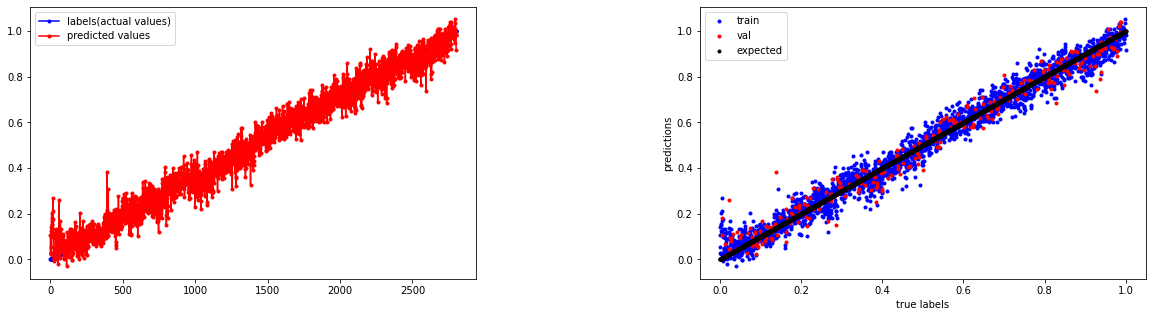

In [ ]:
'''
train1_pfiles = [pkzfiles_path+'bearing1_1_train_data.pkz'] => 
pkzfiles_path - is pickle files(.pkz files) path. created pkzfiles_path variable, and assigned (= allocate, allot, set) the path where the pickle(.pkz) files 
were saved in the google drive. (pkzfiles_path = '/content/drive/MyDrive/Colab Notebooks/')
bearing1_1_train_data.pkz - bearing1_1 train data pickle file
in train1_pfiles, we stored the bearing1_1 train data pickle file

val1_pfiles = [pkzfiles_path+'bearing1_1_val_data.pkz'] =>
pkzfiles_path - is pickle files(.pkz files) path. created pkzfiles_path variable, and assigned (= allocate, allot, set) the path where the pickle(.pkz) files 
were saved in the google drive. (pkzfiles_path = '/content/drive/MyDrive/Colab Notebooks/')
bearing1_1_val_data.pkz - bearing1_1 validation data pickle file
in val_pfiles, we stored the bearing1_1 validation data pickle file

train1_dataset = PHMDataset(pfiles=train1_pfiles) => 
created train1_dataset variable and called PHMDataset class and send pfiles as a parameter inside the class and assigned train1_pfiles to the pfiles. therefore 
PHMDataset class now can access to bearing1_1_train_data.pkz, hence with train1_dataset, can access bearing1_1 train data pickle file

val1_dataset = PHMDataset(pfiles=val1_pfiles) => 
created val1_dataset variable and called PHMDataset class and send pfiles as a parameter inside the class and assigned val1_pfiles to the pfiles. therefore 
PHMDataset class now can access to bearing1_1_val_data.pkz, hence with val1_dataset, can access bearing1_1 validation data pickle file

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1) =>
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1) => 
DataLoader is an iterator which is used to iterate over train1_dataset and val1_dataset
train1_dataset is our train dataset, train1_dataset contains bearing1_1_train_data.pkz (bearing1_1 train data pickle file)
val1_dataset is our validation dataset, val1_dataset contains bearing1_1_val_data.pkz (bearing1_1 validation data pickle file)
batch_size => refers to the no. of samples in each batch
shuffle => whether we want the data to be shuffled(= rearranged or reorganized) or not. shuffle is a boolean value, either true or false. shuffle=true 
represents data to be shuffled. shuffle=false represents data not to be shuffled
num_workers => no. of processes needed for loading(= activating, starting) the data, here, num_workers=1, therefore 1 time processing will be carried out for
data loading

train1_results = model_inference_helper(model, train1_dataloader) =>
model_inference_helper(model, train1_dataloader) - this function uses a trained machine learning model(i.e. CNN_FP() ) to make a prediction on 
bearing1_1_train_data.pkz. here, model is CNN_FP() and train1_dataloader contains bearing1_1 train data pickle file. train1_results is created to store this 
function

val1_results = model_inference_helper(model, val1_dataloader) =>
model_inference_helper(model, val1_dataloader) - this function uses a trained machine learning model(i.e. CNN_FP() ) to make a prediction on 
bearing1_1_val_data.pkz. here, model is CNN_FP() and val1_dataloader contains bearing1_1 validation data pickle file. val1_results is created to store this 
function

results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']} =>
'labels': train1_results['labels']+val1_results['labels'] - therefore, results['labels'] = bearing1_1_train_data.pkz actual values + bearing1_1_val_data.pkz 
          actual values
'predictions': train1_results['predictions']+val1_results['predictions'] - therefore, results['predictions'] = bearing1_1_train_data.pkz predicted values and 
               bearing1_1_val_data.pkz predicted values
therefore, results dictionary contains bearing1_1_trainle_data.pkz actual values + bearing1_1_val_data.pkz actual values + bearing1_1_train_data.pkz predicted 
values + bearing1_1_val_data.pkz predicted values

results = sort_results(results) => sort the results dictionary (arranges the results dictionary elements in a certain order)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5]) => 
In matplotlib, A plot is a graphical technique for representing a data set, usually as a graph showing the relationship between two or more variables. Subplots 
mean groups of axes(x-axis, y-axis) that can exist in a single matplotlib figure. subplots() function in the matplotlib library, helps in creating multiple 
layouts(= diagrams, sketches) of subplots.
plt.subplots(nrows=1, ncols=2, figsize=[20,5]) - plt.subplots() create a figure and a set of subplots. nrows - number of rows of a subplot grid. ncols - number
                                                 of columns of a subplot grid. figsize method in matplotlib is used to set the dimensions(length and width) of
                                                 a matplotlib figure. figsize is also used to change the dimensions(length and width) of a matplotlib figure. 
                                                 here, 20 is the width and 5 is the height
                                                 (grid - a pattern of horizontal and vertical lines that cross each other to make a set of squares. A grid looks
                                                 like this - https://www.mathsisfun.com/definitions/grid.html)

ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels') =>
plotting labels(actual values) of bearing1_1_train_data.pkz and bearing1_1_val_data.pkz. The labels or actual values represented with blue color('b.-') in the 
plot or graph and labeled(= named) as labels(actual values)
(A plot is a graphical technique for representing a data set, usually as a graph showing the relationship between two or more variables. The plot() function is 
used to draw points(markers) in a diagram. By default, the plot() function draws a line from point to point. The function takes parameters for specifying points 
in the diagram. Parameter 1 is an array containing the points on the x-axis. Parameter 2 is an array containing the points on the y-axis.)

ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values') =>
plotting predicted values of bearing1_1_train_data.pkz and bearing1_1_val_data.pkz. The predicted values represented with red color('r.-') in the plot or graph 
and labeled(= named) as predicted values

ax[0].legend() => ax[0].legend() is used to display the tags or labels(i.e. labels(actual values) and predicted values) on top left of the plot

(ax[0] => represents 1st column)

ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train') =>
scatter() => https://www.w3schools.com/python/matplotlib_scatter.asp (With Matplotlib Pyplot, we can use the scatter() function to draw a scatter plot. The 
scatter() function plots one dot(= point) for each observation(plots one dot for x-axis and y-axis combined). It needs two arrays or lists or tuples, etc. of 
the same length, one for the values of the x-axis, and one for values on the y-axis)
train1_results['labels'] => x-axis(horizontal axis), bearing1_1_train_data true labels(or bearing1_1_train_data actual values)
(actual value - the actual value is the value that is obtained by observation or by measuring the available data(or past data or previous performance data). It 
is also called the observed value. )
train1_results['predictions'] => y-axis(vertical axis), bearing1_1_train_data predicted values
(predicted value - The predicted value is the value that is predicted based on the regression analysis. Regression problem => Predicting a value for an input 
observation based on previous(=past) data.)
marker => https://matplotlib.org/stable/api/markers_api.html
c='b' => represents blue color to the label
label='train' => means labeled(= named) as train
since we used scatter() function for plotting, it plots the point based on both x-axis(true labels) and y-axis(predictions). Basically scatter() function plots
one point for both x-axis and y-axis

ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
val1_results['labels'] => x-axis(horizontal axis), bearing1_1_val_data true labels(or bearing1_1_val_data actual values)
val1_results['predictions'] => y-axis(vertical axis), bearing1_1_val_data predicted values
marker => https://matplotlib.org/stable/api/markers_api.html
c='r' => represents red color to the label
label='val' => means labeled(= named) as val

ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected') =>
results['labels'] => x-axis(horizontal axis), bearing1_1_train_data true labels and bearing1_1_val_data true labels
results['labels'] => y-axis(vertical axis), bearing1_1_train_data true labels and bearing1_1_val_data true labels
marker => https://matplotlib.org/stable/api/markers_api.html
c='k' => represents black color to the label
label='expected' => means labeled(= named) as expected
(expected - our ideal(= perfect) expected values. for example ideally, if the real value or actual value or true label or label is 0.1, then predicted value
should also 0.1. basically expected label is plotted to visualize(= analyze, view, see) the results(train, val), how much closely related to the ideal 
expected values. here, expected represents a black line, if we draw plot to all the real values then we get the expected values. Ideally, the results predicted
should lie on the black line(i.e. expected values line), then only we can say that our model is performing correctly)

ax[1].set_xlabel('true labels') => labelled(= named) x-axis as true labels

ax[1].set_ylabel('predictions') => labelled(= named) y-axis as predictions

ax[1].legend() => ax[1].legend() is used to display the tags or labels(i.e. train, val and expected) on top left of the plot

(ax[1] => represents 2nd column)

plt.subplots_adjust(wspace=0.5) => plt.subplots_adjust - adjust the subplot layouts(= diagrams, sketches)
                                   wspace - The width of the padding(= spacing) between subplots, here wspace=0.5

plt.show() => The show() function in pyplot module of matplotlib library is used to display the plot or diagram or figure. here, plt.show() is used to display 
              the hexagonal binning plot as shown in output

'''
train1_pfiles = [pkzfiles_path+'bearing1_1_train_data.pkz']
val1_pfiles = [pkzfiles_path+'bearing1_1_val_data.pkz']
train1_dataset = PHMDataset(pfiles=train1_pfiles)
val1_dataset = PHMDataset(pfiles=val1_pfiles)

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1)
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1)

train1_results = model_inference_helper(model, train1_dataloader)
val1_results = model_inference_helper(model, val1_dataloader)
results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']}
results = sort_results(results)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5])
ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels(actual values)')
ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values')
ax[0].legend()
ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train')
ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected')
ax[1].set_xlabel('true labels')
ax[1].set_ylabel('predictions')
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()

**Performance on bearing1_2.pkz dataset**

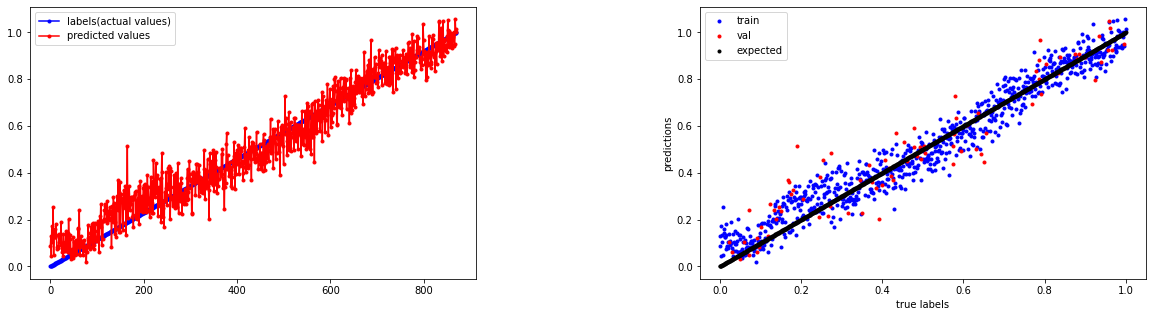

In [ ]:
train1_pfiles = [pkzfiles_path+'bearing1_2_train_data.pkz']
val1_pfiles = [pkzfiles_path+'bearing1_2_val_data.pkz']
train1_dataset = PHMDataset(pfiles=train1_pfiles)
val1_dataset = PHMDataset(pfiles=val1_pfiles)

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1)
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1)

train1_results = model_inference_helper(model, train1_dataloader)
val1_results = model_inference_helper(model, val1_dataloader)
results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']}
results = sort_results(results)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5])
ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels(actual values)')
ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values')
ax[0].legend()
ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train')
ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected')
ax[1].set_xlabel('true labels')
ax[1].set_ylabel('predictions')
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()

**Peformance on bearing2_1.pkz dataset**

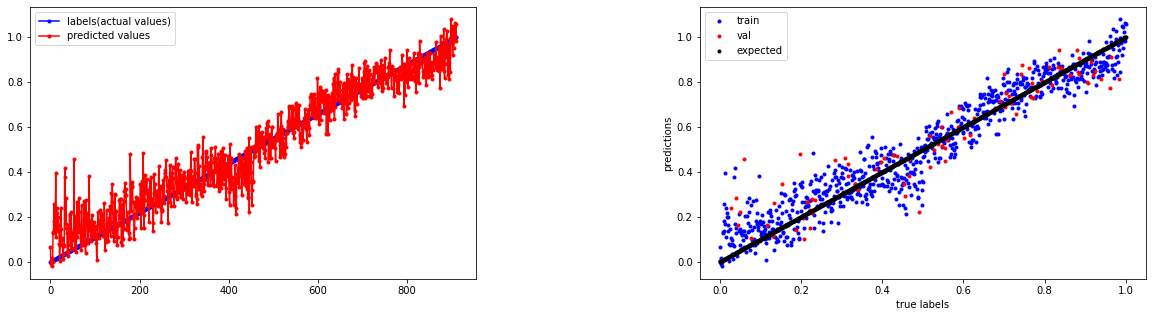

In [ ]:
train1_pfiles = [pkzfiles_path+'bearing2_1_train_data.pkz']
val1_pfiles = [pkzfiles_path+'bearing2_1_val_data.pkz']
train1_dataset = PHMDataset(pfiles=train1_pfiles)
val1_dataset = PHMDataset(pfiles=val1_pfiles)

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1)
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1)

train1_results = model_inference_helper(model, train1_dataloader)
val1_results = model_inference_helper(model, val1_dataloader)
results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']}
results = sort_results(results)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5])
ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels(actual values)')
ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values')
ax[0].legend()
ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train')
ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected')
ax[1].set_xlabel('true labels')
ax[1].set_ylabel('predictions')
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()

**Performance on bearing2_2.pkz dataset**

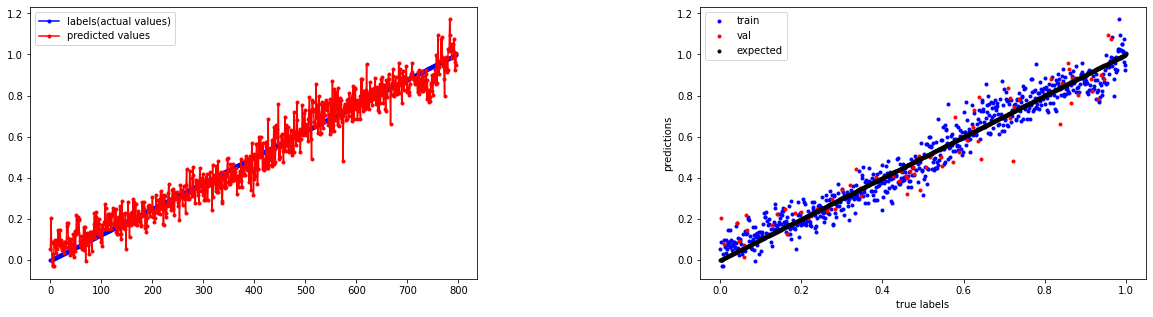

In [ ]:
train1_pfiles = [pkzfiles_path+'bearing2_2_train_data.pkz']
val1_pfiles = [pkzfiles_path+'bearing2_2_val_data.pkz']
train1_dataset = PHMDataset(pfiles=train1_pfiles)
val1_dataset = PHMDataset(pfiles=val1_pfiles)

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1)
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1)

train1_results = model_inference_helper(model, train1_dataloader)
val1_results = model_inference_helper(model, val1_dataloader)
results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']}
results = sort_results(results)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5])
ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels(actual values)')
ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values')
ax[0].legend()
ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train')
ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected')
ax[1].set_xlabel('true labels')
ax[1].set_ylabel('predictions')
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()

**Performance on bearing3_1.pkz dataset**

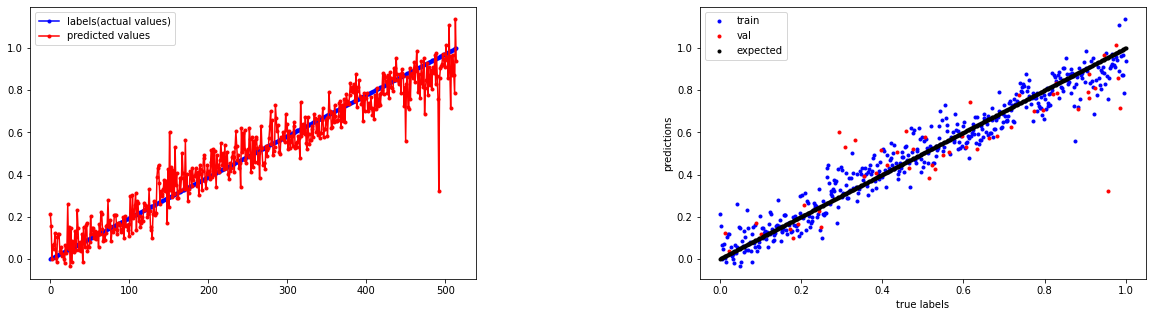

In [ ]:
train1_pfiles = [pkzfiles_path+'bearing3_1_train_data.pkz']
val1_pfiles = [pkzfiles_path+'bearing3_1_val_data.pkz']
train1_dataset = PHMDataset(pfiles=train1_pfiles)
val1_dataset = PHMDataset(pfiles=val1_pfiles)

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1)
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1)

train1_results = model_inference_helper(model, train1_dataloader)
val1_results = model_inference_helper(model, val1_dataloader)
results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']}
results = sort_results(results)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5])
ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels(actual values)')
ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values')
ax[0].legend()
ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train')
ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected')
ax[1].set_xlabel('true labels')
ax[1].set_ylabel('predictions')
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()

**Performance on bearing3_2.pkz dataset**

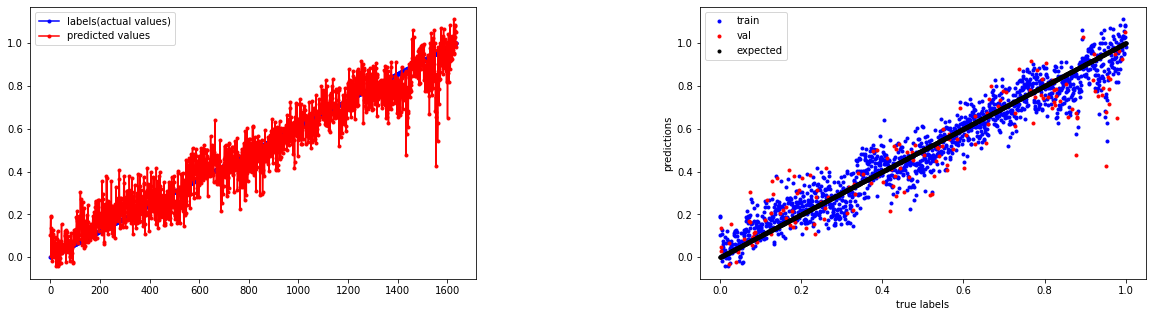

In [ ]:
train1_pfiles = [pkzfiles_path+'bearing3_2_train_data.pkz']
val1_pfiles = [pkzfiles_path+'bearing3_2_val_data.pkz']
train1_dataset = PHMDataset(pfiles=train1_pfiles)
val1_dataset = PHMDataset(pfiles=val1_pfiles)

train1_dataloader = DataLoader(train1_dataset, batch_size=64, shuffle=False, num_workers=1)
val1_dataloader = DataLoader(val1_dataset, batch_size=64, shuffle=False, num_workers=1)

train1_results = model_inference_helper(model, train1_dataloader)
val1_results = model_inference_helper(model, val1_dataloader)
results = {'labels': train1_results['labels']+val1_results['labels'], 'predictions': train1_results['predictions']+val1_results['predictions']}
results = sort_results(results)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,5])
ax[0].plot(range(len(results['labels'])), results['labels'], 'b.-', label='labels(actual values)')
ax[0].plot(range(len(results['predictions'])), results['predictions'], 'r.-', label='predicted values')
ax[0].legend()
ax[1].scatter(train1_results['labels'], train1_results['predictions'], marker='.', c='b', label='train')
ax[1].scatter(val1_results['labels'], val1_results['predictions'], marker='.', c='r', label='val')
ax[1].scatter(results['labels'], results['labels'], marker='.', c='k', label='expected')
ax[1].set_xlabel('true labels')
ax[1].set_ylabel('predictions')
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()